# Titanic Survival Analysis: Predicting Passenger Survival on the Titanic
Technical Test - Nabila Putri Ananda

**Problem Statment**

    On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

    In the Hollywood blockbuster that was modelled on this tragedy, it seemed to be the case that upper-class people, women and children were more likely to survive than others. But did these properties (socio-economic status, sex and age) really influence one's survival chances?

    Based on data of a subset of 891 passengers on the Titanic, I will make a model that can be used to predict survival of other Titanic passengers.

    Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

**Objective:** 

    The objective of this project is to build a predictive model that can determine whether a passenger survived or not based on the available Titanic dataset. The model will leverage attributes such as gender, age, ticket class, and other relevant features to make predictions about the passengers' survival.

**Data Dictionary:**

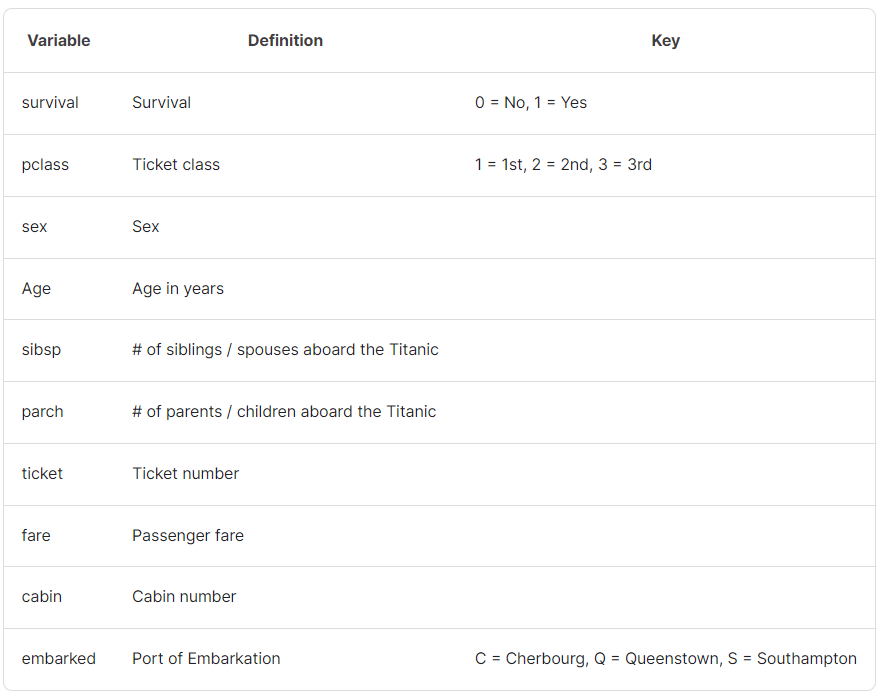

**A bit about the dataset**

- 'Pclass' column contains a number which indicates class of the passenger's ticket: 1 for first class, 2 for second class and 3 for third class. This could function as a proxy for the socio-economic status of the passenger ('upper', 'middle', 'low').
- The 'SibSp' column contains the number of siblings + spouses of the passenger also aboard the Titanic;
- the 'ParCh' column indicates the number of parents + children of the passenger also aboard the Titanic.
- The 'Ticket' column contains the ticket numbers of passengers (which are not likely to have any predictive power regarding survival);
- 'Cabin' contains the cabin number of the passenger, if he/she had a cabin, and lastly,
- 'Embarked' indicates the port of embarkation of the passenger: Cherbourg, Queenstown or Southampton. The meaning of the other columns is clear, I think.

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
pal = sns.color_palette()
import klib

from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

# Import Metrics Evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix, classification_report, roc_auc_score, make_scorer

# Import Models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

## 2. Loading the Dataset

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

#### Display Train Data

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Display Test Data

In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Check Number of Rows & Features

In [5]:
print('Total Rows (Train):', train_df.shape[0])
print('Total Features (Train):', train_df.shape[1])
print('Total Rows (Test):', test_df.shape[0])
print('Total Features (Test):', test_df.shape[1])
print('Total Rows (Combine Train & Test):', (train_df.shape[0]+test_df.shape[0]))

Total Rows (Train): 891
Total Features (Train): 12
Total Rows (Test): 418
Total Features (Test): 11
Total Rows (Combine Train & Test): 1309


**Observation**:
- The dataset used in this project consists of two parts: the training data and the test data. The training data contains information about passengers' survival status, while the test data does not include survival information. The survived feature for the test data is found in the gender_submission.csv dataset.
- The number of samples in the training data is 891 while in the test data it is 418. so the total samples if added up is 1309 data

## 3. Exploratory Data Analysis

### 3.1. Descriptive Statistics

#### Create Train Data Info

In [6]:
list_item = []
for col in train_df.columns:
    list_item.append([col, train_df[col].dtype, train_df[col].isna().sum(), 100*train_df[col].isna().sum()/len(train_df[col]), train_df[col].nunique(), train_df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,PassengerId,int64,0,0.000000,891,"[1, 2, 3, 4]"
1,Survived,int64,0,0.000000,2,"[0, 1]"
2,Pclass,int64,0,0.000000,3,"[3, 1, 2]"
3,Name,object,0,0.000000,891,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B..."
4,Sex,object,0,0.000000,2,"[male, female]"
5,Age,float64,177,19.865320,88,"[22.0, 38.0, 26.0, 35.0]"
6,SibSp,int64,0,0.000000,7,"[1, 0, 3, 4]"
7,Parch,int64,0,0.000000,7,"[0, 1, 2, 5]"
8,Ticket,object,0,0.000000,681,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803]"
9,Fare,float64,0,0.000000,248,"[7.25, 71.2833, 7.925, 53.1]"


#### Create Test Data Info

In [7]:
list_item = []
for col in test_df.columns:
    list_item.append([col, test_df[col].dtype, test_df[col].isna().sum(), 100*test_df[col].isna().sum()/len(test_df[col]), test_df[col].nunique(), test_df[col].unique()[:4]])
desc2_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc2_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,PassengerId,int64,0,0.000000,418,"[892, 893, 894, 895]"
1,Pclass,int64,0,0.000000,3,"[3, 2, 1]"
2,Name,object,0,0.000000,418,"[Kelly, Mr. James, Wilkes, Mrs. James (Ellen N..."
3,Sex,object,0,0.000000,2,"[male, female]"
4,Age,float64,86,20.574163,79,"[34.5, 47.0, 62.0, 27.0]"
5,SibSp,int64,0,0.000000,7,"[0, 1, 2, 3]"
6,Parch,int64,0,0.000000,8,"[0, 1, 3, 2]"
7,Ticket,object,0,0.000000,363,"[330911, 363272, 240276, 315154]"
8,Fare,float64,1,0.239234,169,"[7.8292, 7.0, 9.6875, 8.6625]"
9,Cabin,object,327,78.229665,76,"[nan, B45, E31, B57 B59 B63 B66]"


#### Check Missing Value

In [8]:
def plot_missing_data(dataset, title):
    fig, ax = plt.subplots(figsize=(5,5))
    plt.title(title)  
    sns.heatmap(dataset.isnull(), cbar=False)

In [9]:
# check number of missing data in data train
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

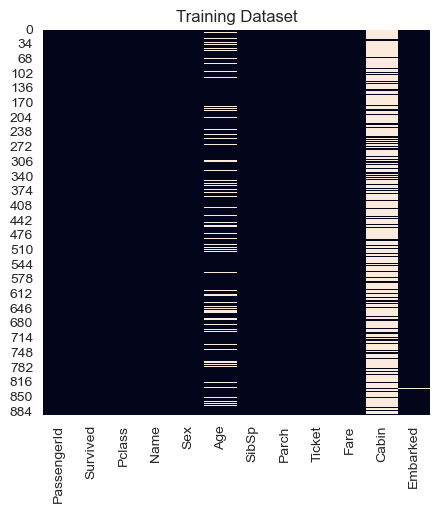

In [10]:
plot_missing_data(train_df, "Training Dataset")

**Train Data:** 
- There are missing value in Age, Cabin, Embarked features contain a number of null values 
- Data Types: helping during converting goal
    - Seven features are integer or floats.
    - Five features are strings (object).

In [11]:
# check number of missing data in data test
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

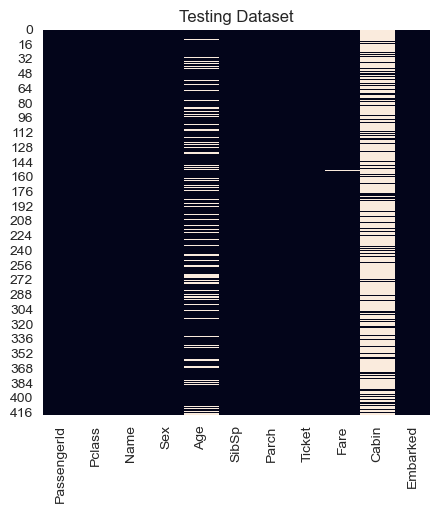

In [12]:
plot_missing_data(test_df, "Testing Dataset")

**Test Data:** 
- There are missing value in Cabin, Age, and Fare features contain a number of null values 
- Data Types: helping during converting goal
    - Six features are integer or floats.
    - Five features are strings (object).

#### check number of duplicated data

In [13]:
train_df.duplicated().sum()

0

#### Descriptive Statistics

In [14]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


**distribution of numerical feature values (training dataset)**
1. Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
2. Most passengers (> 75%) did not travel with parents or children..
3. Nearly 30% of the passengers had siblings and/or spouse aboard.
4. Fares varied significantly with few passengers (<1%) paying as high as $512.

In [15]:
train_df.describe(exclude=[np.number]).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


**Describe (Categorical Feature):**
1. Dengan nilai unik di kolom "PassengerId" dan "Name", dinyatakan bahwa data memiliki integritas data yang baik, artinya tidak ada data yang terduplikasi. Namun, akan dilakukan penghapusan pada kedua variabel tersebut saat masuk ke dalam langkah analisis data
2. Names are unique across the dataset (count=unique=891)
3. Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
4. Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
5. Embarked takes three possible values. S port used by most passengers (top=S)
6. Ticket feature has high ratio (22%) of duplicate values (unique=681).
7. Around 38% samples survived representative of the actual survival rate at 32%.

#### Check Variance of Features

In [16]:
# Menghitung variance dari setiap fitur
variance_per_feature = train_df.var()

print(variance_per_feature)

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64


- There is no variance that is 0 for each feature, so the conclusion is that each feature has a different variability and at least there is some change in the value of the feature. 
- This shows that each feature provides unique information and is different from other features, so there is no need for data to be dropped based on variance = 0 because each of these features has a contribution in influencing the results of the analysis or model to be made.

In [17]:
# Grouping Features Based on Their Data Type
num = train_df.select_dtypes(include=[np.number], exclude=[np.bool]).columns
cat = train_df.select_dtypes(exclude=[np.number]).columns

In [18]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Features:**

- Categorical Features -> Categorical: Survived, Sex, and Embarked. Ordinal: Pclass
- Numerical Features -> Continous: Age, Fare. Discrete: SibSp, Parch
- Mix Features -> Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric

### 3.2. Univariate Analysis

#### Distribution

<AxesSubplot:xlabel='Fare', ylabel='Density'>

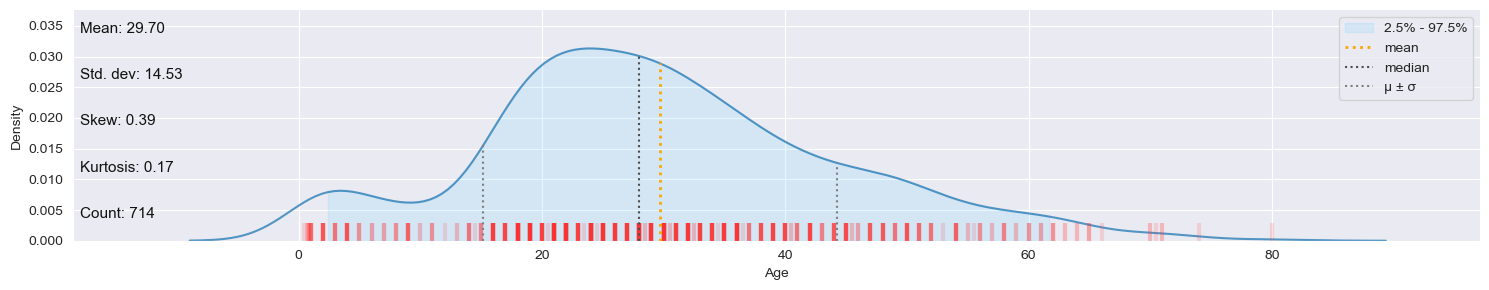

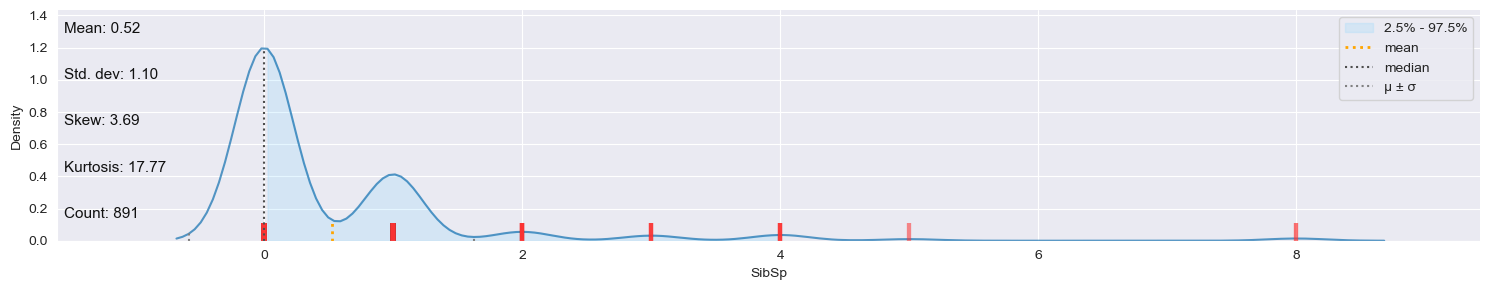

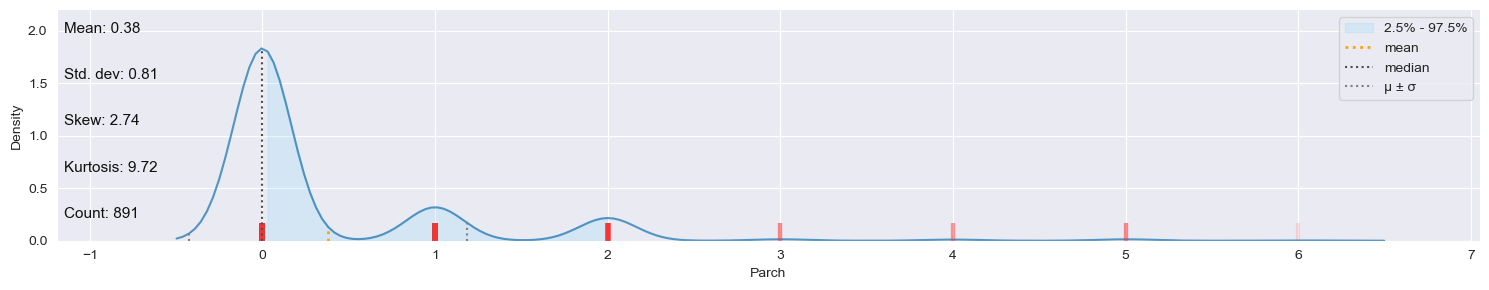

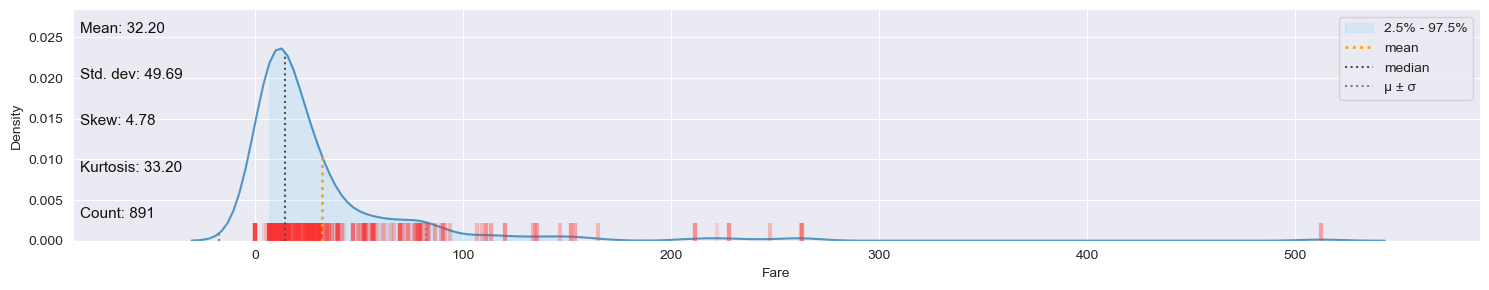

In [19]:
klib.dist_plot(train_df.drop(['PassengerId', 'Pclass'], axis = 1), size = 3)

- All of numeric features except age have right skew distribution.The Histogram above shows that age follows a fairly normal distribution.
- SibSp and Parch features have the central tendency at 0 value.

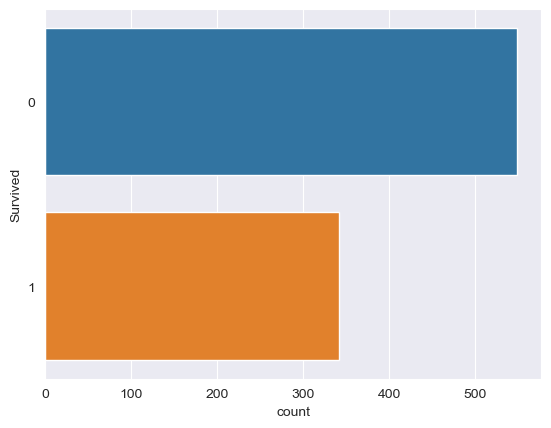

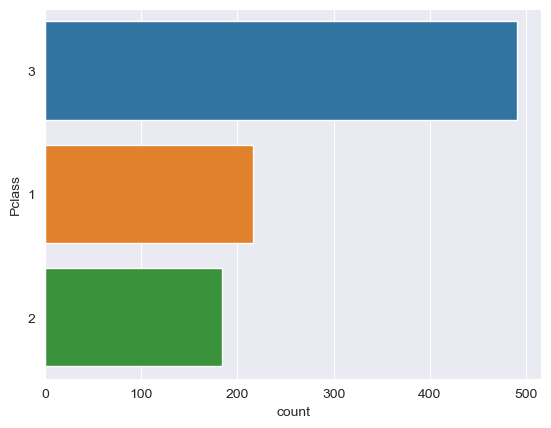

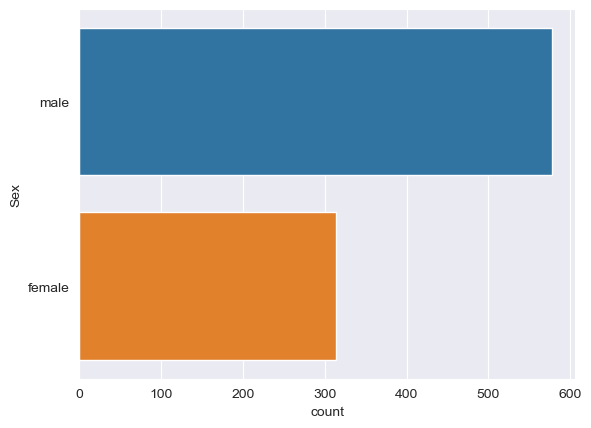

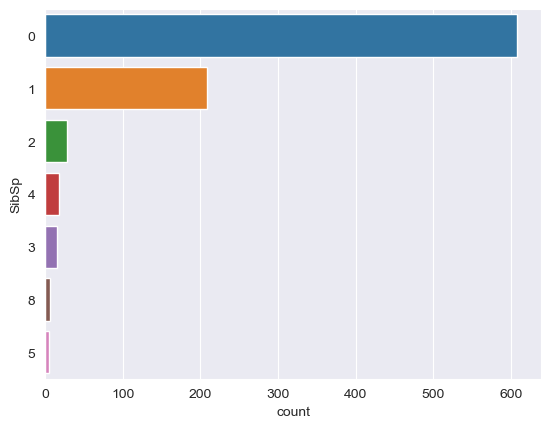

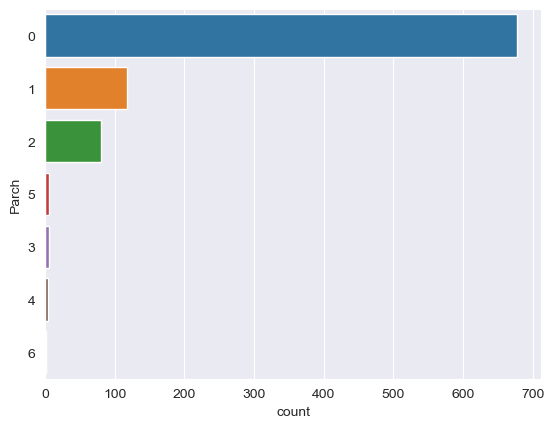

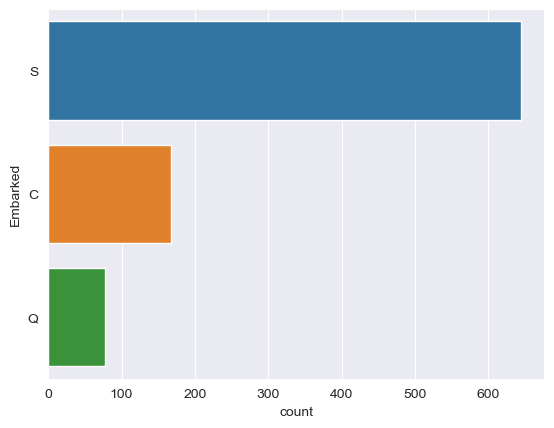

In [20]:
for column in train_df.select_dtypes(include=['object', 'int']):
    if train_df[column].nunique() < 15:
        sns.countplot(y=column,
                      data=train_df,
                     order= train_df[column].value_counts().index)
        plt.show()

- Survived: Fitur ini menunjukkan apakah seorang penumpang selamat (1) atau tidak selamat (0). Ini adalah target variabel yang ingin diprediksi dalam masalah klasifikasi.
- Pclass (Passenger Class): Fitur ini mengindikasikan kelas tempat penumpang berada saat perjalanan. Terdapat tiga kelas: kelas 1 (kelas atas), kelas 2 (kelas menengah), dan kelas 3 (kelas bawah). Mayoritas penumpang berada di kelas 3, karena tiket kelas 3 lebih murah dibandingkan dengan kelas lainnya.
- Sex: Fitur ini mencatat jenis kelamin penumpang, yaitu "male" (laki-laki) atau "female" (perempuan). Jumlah penumpang laki-laki cenderung lebih banyak daripada penumpang perempuan.
- Age: Fitur ini mencatat usia penumpang. Usia penumpang bervariasi dari bayi hingga orang dewasa. Mayoritas penumpang berusia dewasa muda hingga tengah.
- SibSp (Siblings/Spouses Aboard): Fitur ini menunjukkan jumlah saudara kandung dan pasangan yang juga ikut dalam perjalanan. Mayoritas penumpang tidak memiliki saudara kandung atau pasangan yang ikut dalam perjalanan.
- Parch (Parents/Children Aboard): Fitur ini mencatat jumlah orangtua atau anak-anak yang juga ikut dalam perjalanan. Mayoritas penumpang tidak membawa orangtua atau anak-anak dalam perjalanan.
- Fare: Fitur ini mencatat tarif (harga) tiket yang dibayar oleh penumpang. Mayoritas penumpang membayar tarif yang lebih rendah, karena tiket kelas 3 cenderung lebih murah.
- Embarked: Fitur ini menunjukkan pelabuhan di mana penumpang naik ke kapal. Terdapat tiga pelabuhan: Cherbourg (C), Queenstown (Q), dan Southampton (S). Mayoritas penumpang naik di pelabuhan Southampton (S).

#### Boxplot

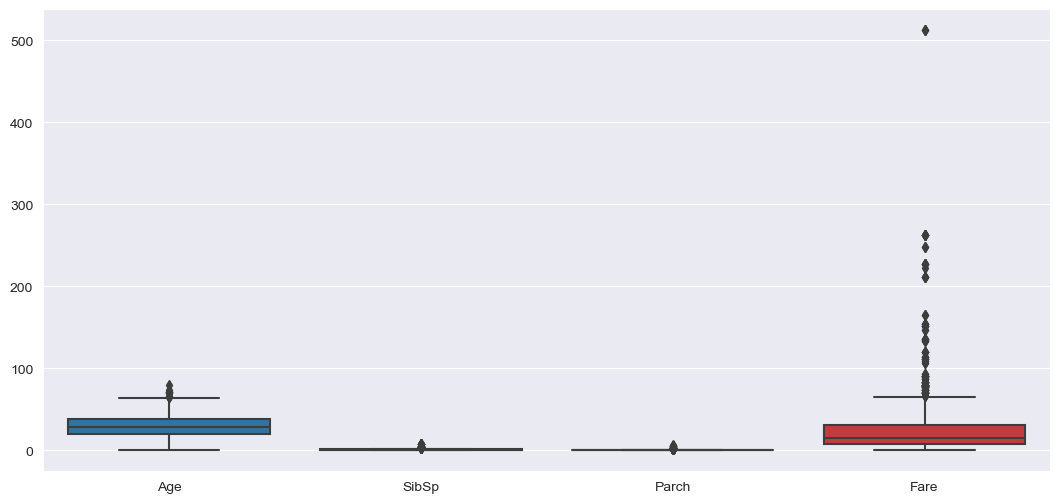

In [21]:
# Memilih empat kolom tertentu
selected_cols = ['Age', 'SibSp', 'Parch', 'Fare']
selected_df = train_df[selected_cols]

# Membuat boxplot untuk empat kolom tertentu dengan ukuran output 8x6 inch
plt.figure(figsize=(13, 6))
sns.boxplot(data=selected_df)

# Menampilkan boxplot
plt.show()

- There are outlier values in all features, farthest outlier is fare. If possible, outlier handling should be done in preprocessing data. but it is also possible not to do outlier handling depending on feature engineering later

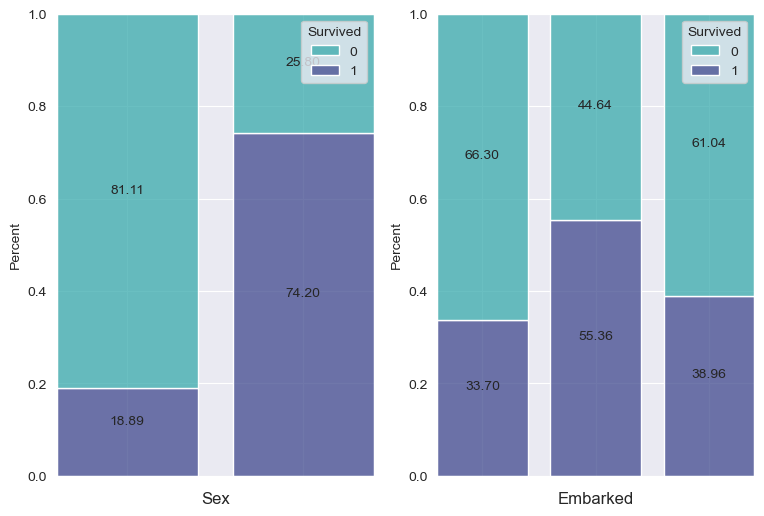

In [24]:
# drop feature PassangerId and Name karena tidak dapat dilihat grafik nya karena unique
drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train_df1 = train_df.drop(drop, axis=1)

dfcategory = train_df1.select_dtypes(include = 'object')
fig,ax= plt.subplots(nrows=1,ncols=2,figsize=(9, 6)) 
for value, subplot in zip(dfcategory.columns,ax.flatten()):
    plotting = sns.histplot(x = dfcategory[value],ax=subplot,palette='mako_r', hue = train_df1['Survived'],multiple="fill", stat="percent",
    discrete=True, shrink=.8 )
    plotting.set_xlabel(value, fontsize = 12)
    plotting.set_xticklabels(plotting.get_xticklabels())
    
    for p in plotting.patches:
        plotting.annotate(format(p.get_height()*100, '.2f'), (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()/2), ha = 'center',
           xytext = (0, 6), textcoords = 'offset points')

plt.show()

- the majority of passengers were male but those who managed to survive were women
- A higher proportion of passengers boarding at the port of Queenstown in Ireland died compared to passengers from other ports

### 3.3. Multivariate Analysis

#### Correlation Heatmap

<AxesSubplot:>

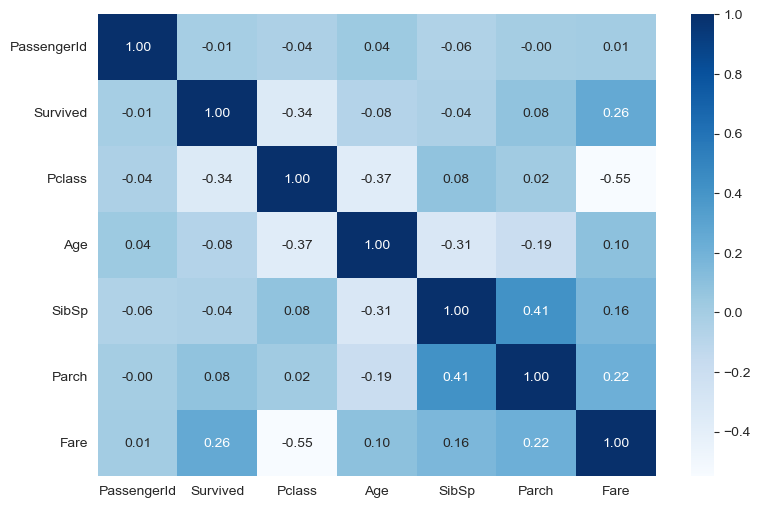

In [25]:
# Create Heatmap Correlation Chart for Each Numerical Features

plt.figure(figsize=(9, 6))
sns.heatmap(train_df.corr(), cmap='Blues', annot=True, fmt='.2f')

<AxesSubplot:>

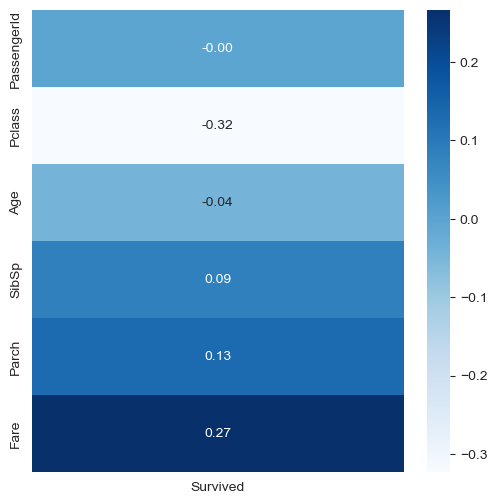

In [26]:
# Create Heatmap Correlation Chart for Each Numerical to Target Features

plt.figure(figsize=(6, 6))
sns.heatmap(train_df.corr(method = 'kendall')[train_df.corr(method = 'kendall').index != 'Survived'][['Survived']], cmap='Blues', annot=True, fmt='.2f')

- pessengerid has no relationship at all because it is the primary key
- pclass is the most correlated (32%) with whether or not passengers survive, which means it could be that the upper class has better access than the lower class

#### Pair Plot

<Figure size 1500x1500 with 0 Axes>

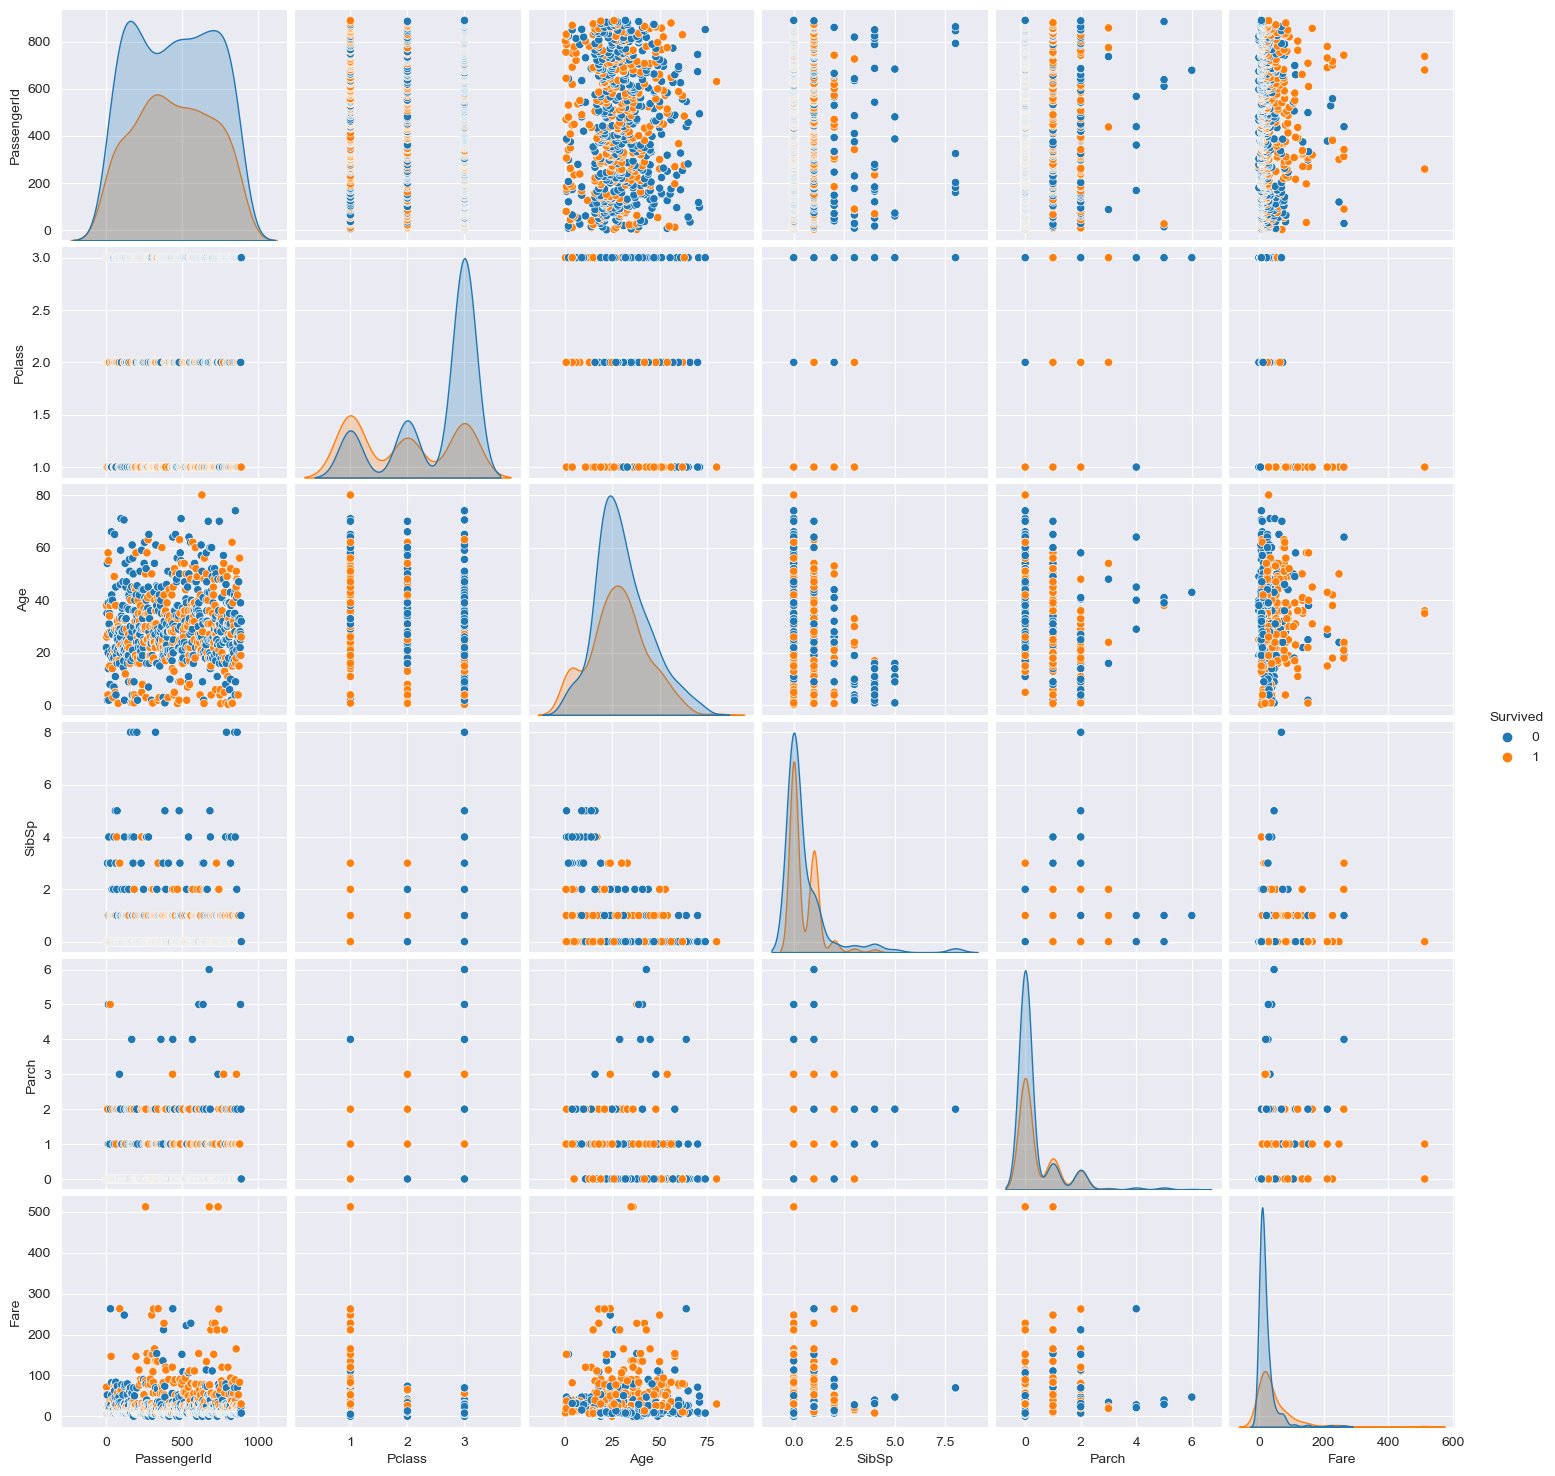

In [27]:
plt.figure(figsize=(15, 15))
sns.pairplot(train_df, diag_kind='kde', hue='Survived')

### 3.3. EDA based on each feature and a combination of several features
additional information to explain in more detail regarding each feature and some feature combinations

In [28]:
# define for visualization
def show_countplot(dataset, feature, title, fsize = (5,5)):
    fig, ax = plt.subplots(figsize=fsize)
    sns.countplot(dataset[feature], ax=ax).set_title(title)
    
def show_compare_countplot(dataset, feature1, feature2, title):
    fig, ax = plt.subplots(figsize=(5,5))
    p = sns.countplot(x = feature1, hue = feature2, data = dataset, ax=ax).set_title(title)   
    
def bar_chart_stacked(dataset, feature, stacked = True):
    survived = dataset[dataset['Survived']==1][feature].value_counts()
    dead = dataset[dataset['Survived']==0][feature].value_counts()
    df_survived_dead = pd.DataFrame([survived,dead])
    df_survived_dead.index = ['Passengers Survived','Passengers Died']
    ax = df_survived_dead.plot(kind='bar',stacked=stacked, figsize=(5,5))
    
def bar_chart_compare(dataset, feature1, feature2=None, title = "Survival rate by sex and class'"):
    plt.figure(figsize = [5,5])
    plt.title(title)
    g = sns.barplot(x=feature1, y='Survived', hue=feature2, ci=None, data=dataset).set_ylabel('Survival rate')
    
def plot_distribution(dataset, feature, title, bins = 30, hist = True, fsize = (5,5)):
    fig, ax = plt.subplots(figsize=fsize)
    ax.set_title(title)
    sns.distplot(train_df[feature], color='g', bins=bins, ax=ax)
    
def plot_kernel_density_estimate_survivors(dataset, feature1, title, fsize = (5,5)):
    fig, ax = plt.subplots(figsize=fsize)
    ax.set_title(title) 
    sns.kdeplot(dataset[feature1].loc[train_df["Survived"] == 1],
                shade= True, ax=ax, label='Survived').set_xlabel(feature1)
    sns.kdeplot(dataset[feature1].loc[train_df["Survived"] == 0],
                shade=True, ax=ax, label="Died")

def plot_swarm_survivors(dataset, feature1, feature2, title, fize = (155)):
    fig, ax = plt.subplots(figsize=(18,5))
    # Turns off grid on the left Axis.
    ax.grid(True)
    plt.xticks(list(range(0,100,2)))
    sns.swarmplot(y=feature1, x=feature2, hue='Survived',data=train_df).set_title(title)

In [29]:
# Convert target features into int data type.
for i in ['PassengerId', 'Survived', 'Pclass']:
    train_df[i] = train_df[i].astype(int)

#### 3.3.1. Analyze Survived Feature
Let's try to understand how many people survived overall:

In [30]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [31]:
train_df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

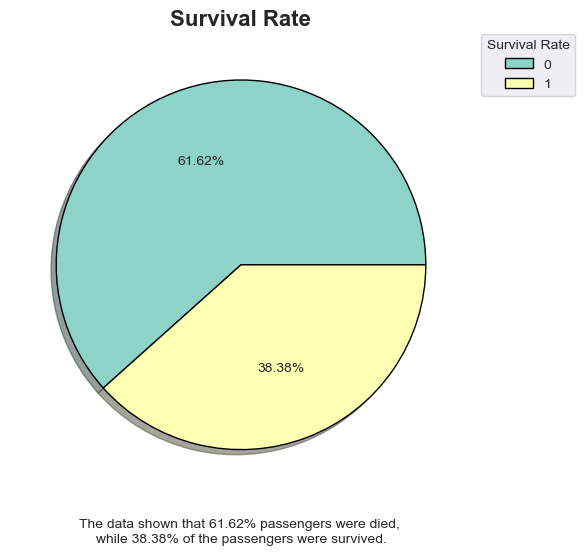

In [32]:
m = train_df.groupby('Survived').agg({'PassengerId' : 'nunique'}).reset_index()
m.columns = ['Survival', 'Total Unique Passenger']
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(m['Total Unique Passenger'], colors = sns.color_palette('Set3'), 
        wedgeprops = {'edgecolor':'k'}, autopct = '%.2f%%', shadow = True, startangle = 0)
ax.set_title('Survival Rate', ha = 'center', fontsize = 16, fontweight='bold')

ax.text(x = 0, y = -1.5, s = 'The data shown that 61.62% passengers were died, \nwhile 38.38% of the passengers were survived.', 
         ha = 'center', fontsize = 10)
ax.legend(labels = m['Survival'], title = 'Survival Rate', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

- As expected the majority of passengers in the training data died. 
- Only 38% survived the disaster. So the training data suffers from data imbalance but it is not severe, therefore I will try to analyze if the data imbalance is handled and not, which one will be better
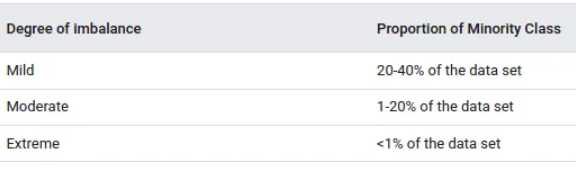

#### 3.3.2. Analyze Sex Feature

In [33]:
train_df['Sex'].value_counts().to_frame()

,Sex
male,577
female,314


- As the majority of passenger were we could infer that the majority of survivors were men.
- We can check this assumption by looking at the bar chart below:

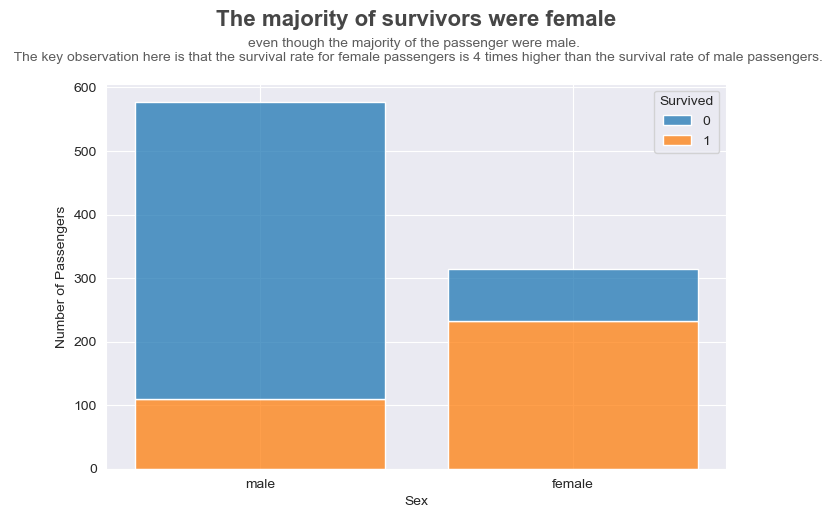

In [34]:
# Create histplot
fig, ax = plt.subplots(1, 1, figsize = (8,5))

sns.histplot(x = 'Sex', data = train_df, hue = 'Survived', 
             kde = False, multiple = 'stack', 
             bins = 25, shrink = 0.8, 
             ax = ax)

ax.set_ylabel('Number of Passengers')
ax.set_xlabel('Sex')

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text((Xstart+Xend)/2, Yend*1.15, 'The majority of survivors were female', 
        ha = 'center', fontsize = 16, fontweight='bold', alpha = 0.85)

ax.text((Xstart+Xend)/2, Yend*1.12, "even though the majority of the passenger were male. \n The key observation here is that the survival rate for female passengers is 4 times higher than the survival rate of male passengers.", 
        ha = 'center', va ='top', fontsize = 10, alpha = 0.75)

# Menghitung persentase untuk setiap kategori 'Sex' dan value survive
total_data = len(train_df)
    
plt.show()

In [35]:
train_df.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

#### 3.3.3. Analyze Feature Pclass

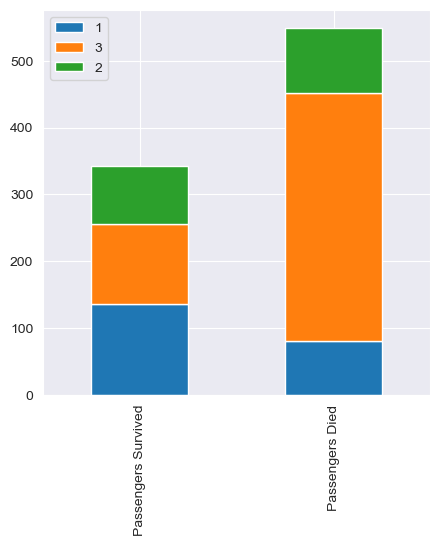

In [36]:
bar_chart_stacked(train_df, 'Pclass')

In [37]:
pd.pivot_table(train_df, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [38]:
train_df.groupby(['Pclass']).Survived.mean().to_frame()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


**Observation:**

From the plots and tables above it becomes clear that the Pclass is an important factor to consider.

- Most passenger had class 3 tickets, yet only 24% of class 3 passengers survived.
- Almost 63% of the passenger from class 1 survived. 
- Also approx 50% of the class 2 passenger survived.

One questions that comes into mind is: **Is the class or sex the deciding factor?**

In [39]:
def bar_chart_compare(dataset, feature1, feature2=None, title = "Survival rate by sex and class'"):
    plt.figure(figsize = [5,5])
    plt.title(title)
    g = sns.barplot(x=feature1, y='Survived', hue=feature2, ci=None, data=dataset).set_ylabel('Survival rate')

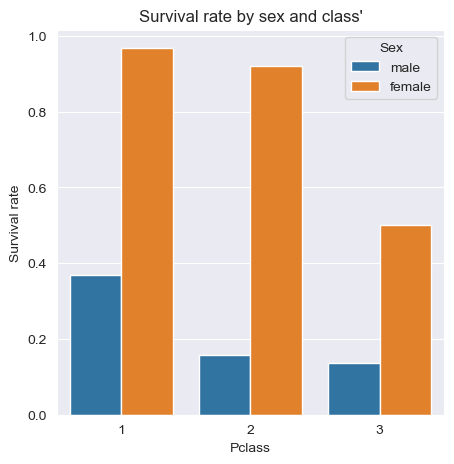

In [40]:
bar_chart_compare(train_df, "Pclass", "Sex")

In [41]:
pd.pivot_table(train_df, index = 'Survived', columns = ['Pclass', "Sex"], values = 'Ticket' ,aggfunc ='count')

Pclass        1           2           3     
Sex      female male female male female male
Survived                                    
0             3   77      6   91     72  300
1            91   45     70   17     72   47

In [42]:
train_df.groupby(['Pclass', "Sex"]).Survived.mean().to_frame()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

**Observation:**

Here, we can clearly see that the question was justified. Irrespective of the class the most important factor when it comes to surviving was gender. (At least between Sex and Pclass)
However, men in class 1 had a significantly higher chance of survival when they bought class 1 tickets.
This just shows to say that we should keep both features as both yield insightful information that should help our model.
- Survival Rate females 1. Class: 96,8%
- Survival Rate females 2. Class: 92,1%
- Survival Rate females 3. Class: 50% 

- Survival Rate male 1. Class: 36.8%
  <br>(still significantly lower than 3. class females)
    

#### 3.3.4. Analyze Feature Age

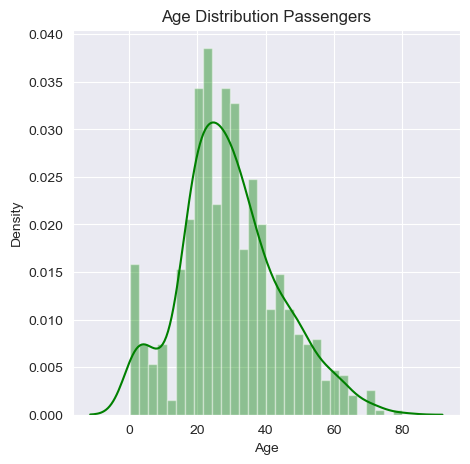

In [43]:
plot_distribution(train_df, "Age", "Age Distribution Passengers")

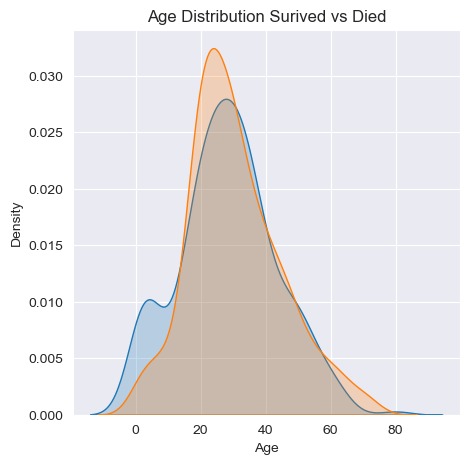

In [44]:
plot_kernel_density_estimate_survivors(train_df, "Age", "Age Distribution Surived vs Died")

**Observation:**

- The Histogram above shows that age follows a fairly normal distribution.

- Also investigating the kernel density estimate does not provide additional information except a raise in survivors at a very young age.
However, one idea might be to investigate age and sex together.

#### 3.3.5. Analyze FeatureFeature Age & Sex together

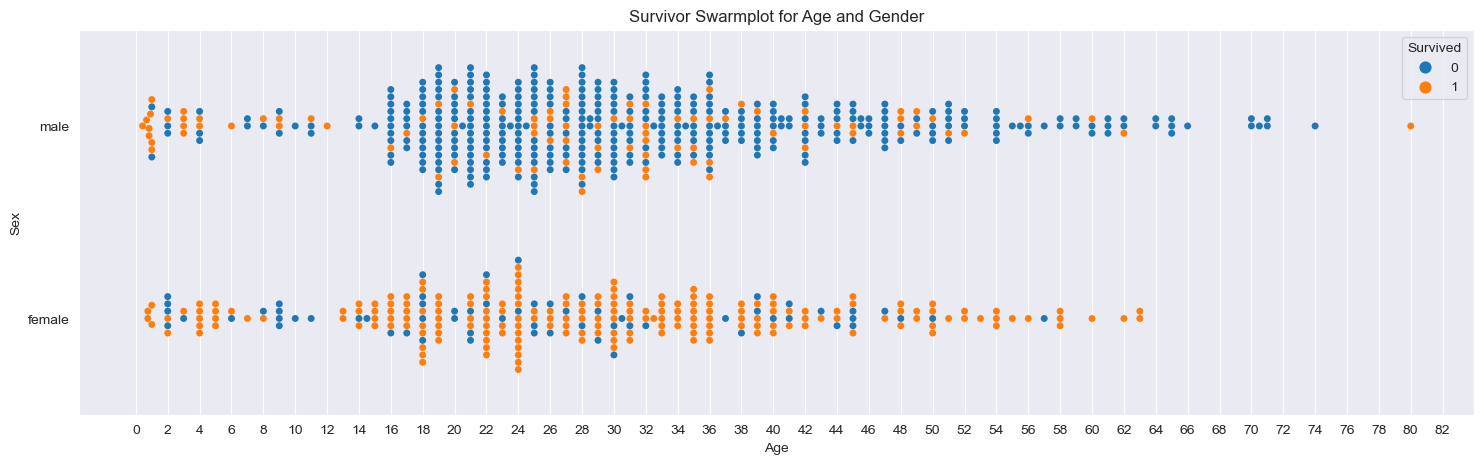

In [45]:
plot_swarm_survivors(train_df, "Sex", "Age", "Survivor Swarmplot for Age and Gender")

**Observation:**
- As expected age holds valuable information. The swarm plot above shows that a big portion of male survivors are passengers between 0 and 12 years of age.
- It's also interesting to see that the oldest passenger 80 year old man survived.

#### 3.3.6. Analyze FeatureFeature Age & Pclass together

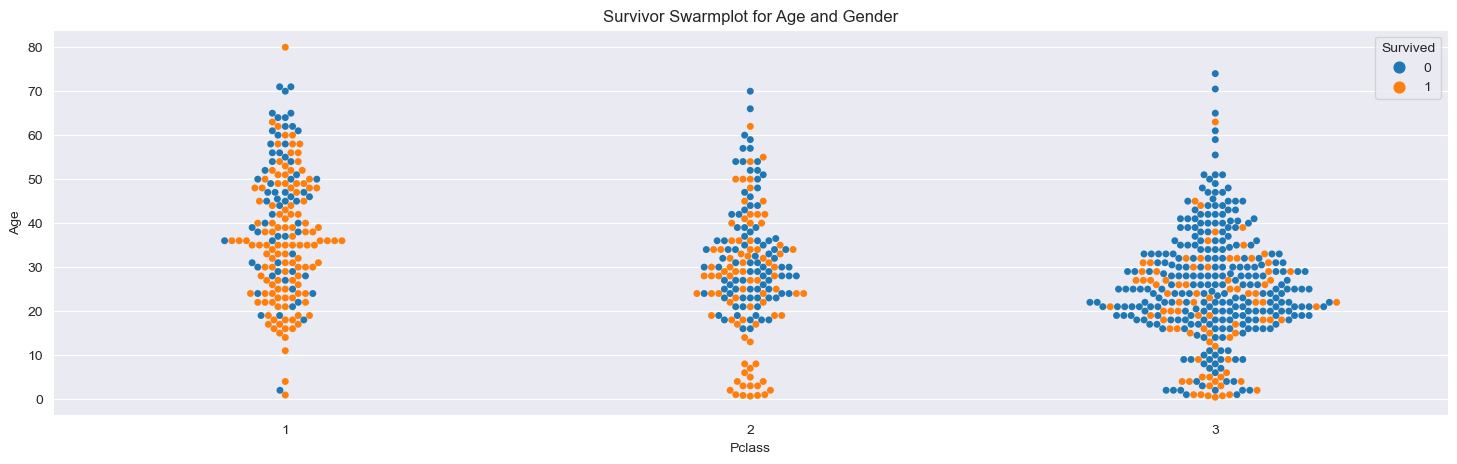

In [46]:
plot_swarm_survivors(train_df, "Age", "Pclass", "Survivor Swarmplot for Age and Gender")

**Observation:**
- Once more we can see the importance of Pclass when it comes to predicting the likelihood of survival.
- One additional piece of information from the plot above is that the first-class did not have a lot of children.
- Maybe rich people get fewer kids?

#### 3.3.7. Analyze Feature Fare

In [47]:
train_df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

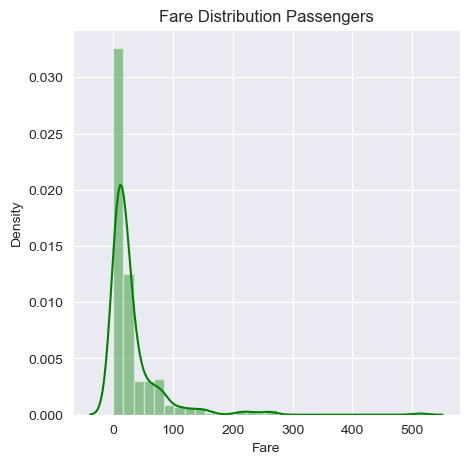

In [48]:
plot_distribution(train_df, "Fare", "Fare Distribution Passengers")

**Observation:**
- Fare does not follow a normal distribution and has a huge spike at the price range [0-100$].

- The distribution is skewed to the left with 75% of the fare paid under 31% and a max paid fare of 512$.
- Depending on the model that I'm going to use it might make sense to normalize this feature. However, this aspect will be tackled later in the feature engineering section.
- To better understand how this feature influences the survival rate, we could plot bar plots of Fare vs Survived. However, due to the large range of fares such as plot would not be useful for inferring useful information. 
- A more suited visualization would be to combine fares into categories and then plot the  categories vs Survived. 

In [49]:
def plot_quartiles(dataset, feature, title, categories):
    fig, axarr = plt.subplots(figsize=(5,5))
    fare_ranges = pd.qcut(dataset[feature], len(categories), labels = categories) #. [0, .25, .5, .75, 1.]
    axarr.set_title(title)
    sns.barplot(x=fare_ranges, y=dataset.Survived, ci=None, ax=axarr).set_ylabel('Survival rate')

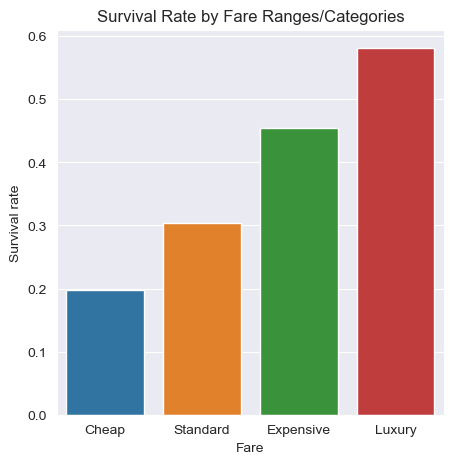

In [50]:
categories = ['Cheap', 'Standard', 'Expensive', 'Luxury']

plot_quartiles(train_df, "Fare", "Survival Rate by Fare Ranges/Categories", categories)

**Observation:**

As we can see the likelihood of survival is definitely influenced by the price paid. 
- Cheap (0-25% of max Price): Surival Rate = 0.2 (aprox)
- Standard (25%-50% of max Price): Surival Rate = 0.3 (aprox)
- Expensive (50%-75% of max Price): Surival Rate = 0.45 (aprox)
- Luxury (75%-100% of max Price): Surival Rate = 0.55 (aprox)

Additionally, we can investigate the relationship between fare, sex and survived to further understand the importance of the feature.

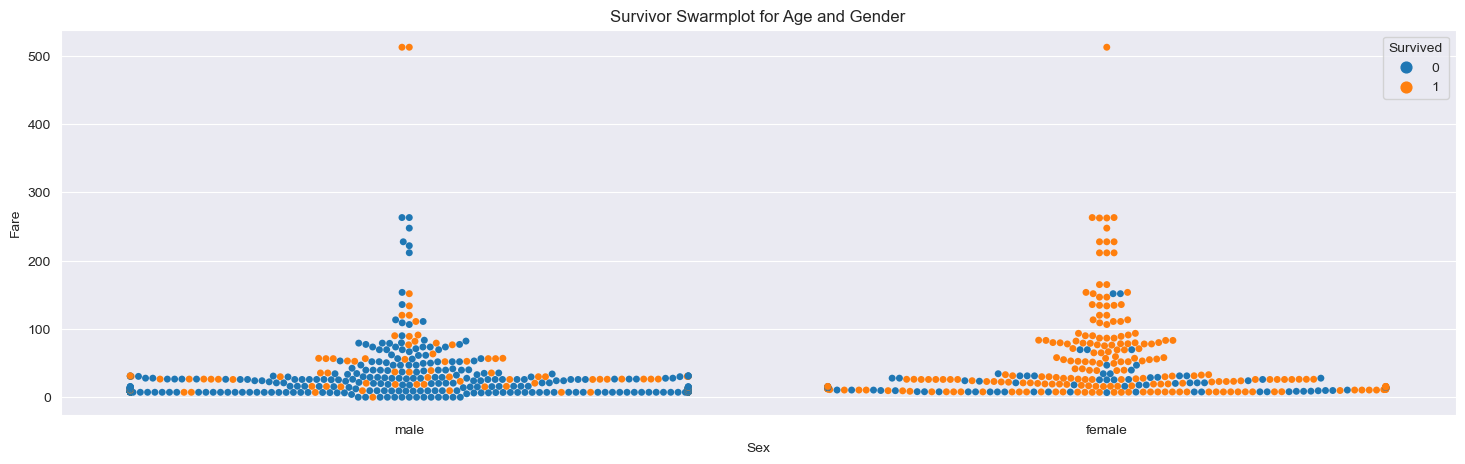

In [51]:
plot_swarm_survivors(train_df, "Fare", "Sex","Survivor Swarmplot for Age and Gender")

**Observation:**

Here, some important observations can be made:
- Irrespective of gender all passengers with a fare above 500$ survived.

- All male passenger that paid between 200-300$ died

- All female passenger that paid between 200-300$ died

This could be a feature a classifier might pick up.

One thing that caught my attention is that the minimum fare paid was 0.0 $.

In [52]:
# This seems highly unlikely. We can investigate who these people were:
train_df.loc[train_df.Fare==0] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [53]:
train_df.corr(method = 'kendall')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.004090,-0.026824,0.027542,-0.048394,0.000798,-0.008921
Survived,-0.004090,1.000000,-0.323533,-0.043385,0.085915,0.133933,0.266229
Pclass,-0.026824,-0.323533,1.000000,-0.286081,-0.039552,-0.021019,-0.573531
Age,0.027542,-0.043385,-0.286081,1.000000,-0.142746,-0.200112,0.093249
SibSp,-0.048394,0.085915,-0.039552,-0.142746,1.000000,0.425241,0.358262
Parch,0.000798,0.133933,-0.021019,-0.200112,0.425241,1.000000,0.330360
Fare,-0.008921,0.266229,-0.573531,0.093249,0.358262,0.330360,1.000000


In [54]:
print(len(train_df.loc[train_df.Fare==0]), 'Passengers paid no fare. As this is nonsensical I decide to replace 0 values with nan and then later to think about how to impute these values.')

15 Passengers paid no fare. As this is nonsensical I decide to replace 0 values with nan and then later to think about how to impute these values.


In [55]:
# Replace Fare == 0 with nan
train_df.loc[train_df['Fare'] == 0, 'Fare'] = np.NaN
test_df.loc[train_df['Fare'] == 0, 'Fare'] = np.NaN

#### 3.3.8. Analyze Feature Embarked

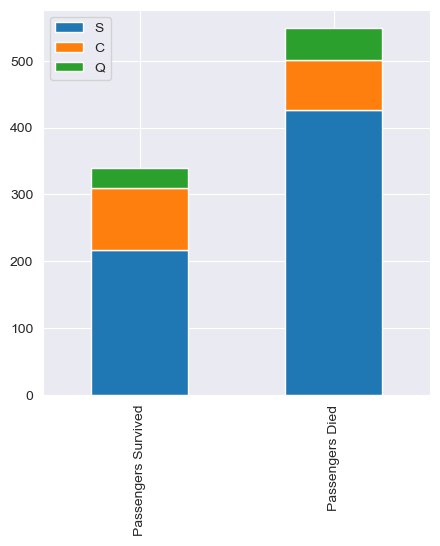

In [56]:
bar_chart_stacked(train_df, 'Embarked') 

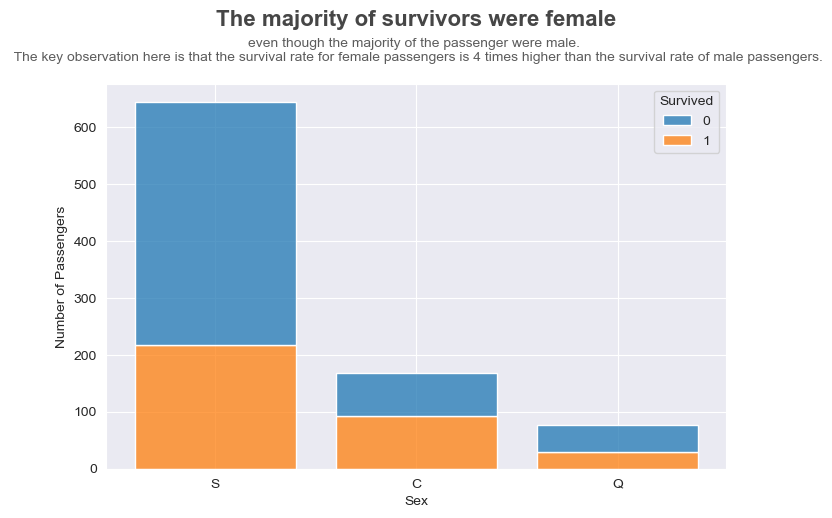

In [57]:
# Create histplot
fig, ax = plt.subplots(1, 1, figsize = (8,5))

sns.histplot(x = 'Embarked', data = train_df, hue = 'Survived', 
             kde = False, multiple = 'stack', 
             bins = 25, shrink = 0.8, 
             ax = ax)

ax.set_ylabel('Number of Passengers')
ax.set_xlabel('Sex')

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text((Xstart+Xend)/2, Yend*1.15, 'The majority of survivors were female', 
        ha = 'center', fontsize = 16, fontweight='bold', alpha = 0.85)

ax.text((Xstart+Xend)/2, Yend*1.12, "even though the majority of the passenger were male. \n The key observation here is that the survival rate for female passengers is 4 times higher than the survival rate of male passengers.", 
        ha = 'center', va ='top', fontsize = 10, alpha = 0.75)

# Menghitung persentase untuk setiap kategori 'Sex' dan value survive
total_data = len(train_df)
    
plt.show()

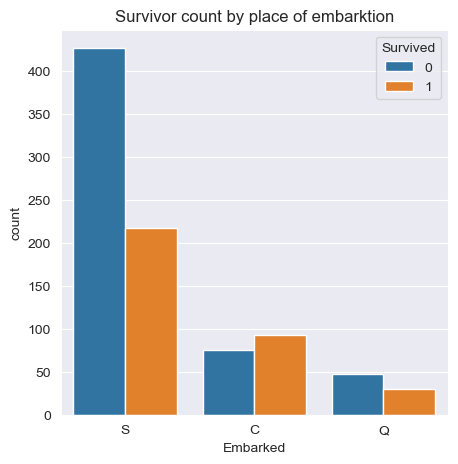

In [58]:
show_compare_countplot(train_df, "Embarked", "Survived", "Survivor count by place of embarktion")

In [59]:
train_df['Embarked'].value_counts().to_frame()

,Embarked
S,644
C,168
Q,77


In [60]:
pd.pivot_table(train_df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [61]:
train_df.groupby(['Embarked']).Survived.mean().to_frame()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


**Observation:**

There are three possible values for the Embarked Feature: 
- Southampton, Cherbourg, and Queenstown.

it can be seen that the majority of passengers embarked from Southampton.
However, only 33% survived the sinking of the titanic.

The highest survival rate of 55% is in the group of passengers that embarked from Cherbourg

Using common sense I would not expect that the place of border changes the likelihood of survival.

**Why is the likelihood of survival higher at Cherbourg?**

As we know from above a better class increases the survival rate drastically.
One indicator may be the percentage of 1. Class passengers that embarked at Cherbourg:

#### 3.3.9. Analyze Feature Embarked & Pclass together

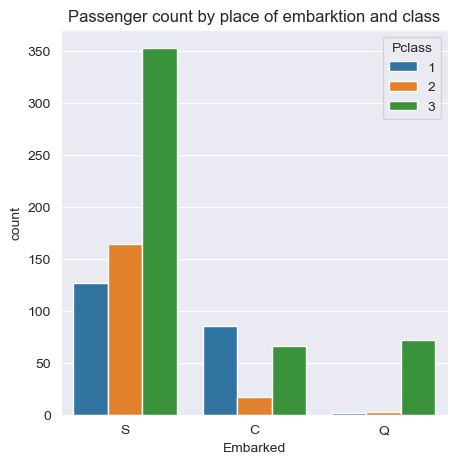

In [62]:
show_compare_countplot(train_df, "Embarked", "Pclass", "Passenger count by place of embarktion and class")

In [63]:
train_df.groupby(['Embarked', 'Pclass']).Survived.sum().to_frame()

Survived
Embarked Pclass          
C        1             59
         2              9
         3             25
Q        1              1
         2              2
         3             27
S        1             74
         2             76
         3             67

**Observation:**

The hypothesis seems to be correct. 
- The majority embarked at Cherbourg were 1. class passengers.
- The majority embarked at Southampton were 3. class passengers.

However, it does not explain why the survival rate at Queenstown is slightly higher than at Southampton even though the number of 1. class passenger concerning 3. class passengers is higher at Southampton.

One hypothesis is that maybe the ratio between male and female passengers differs:

#### 3.3.10. Analyze Feature Embarked & Sex together

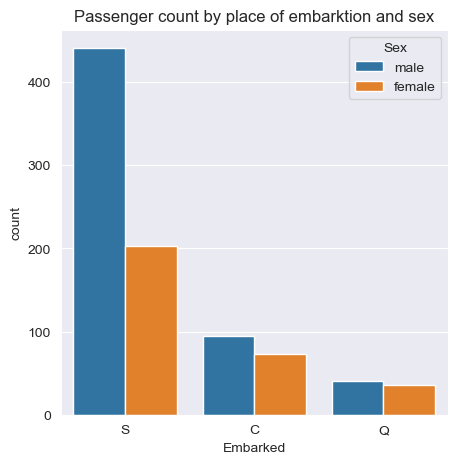

In [64]:
show_compare_countplot(train_df, "Embarked", "Sex", "Passenger count by place of embarktion and sex")

**Observation:**

As expected twice as many male passengers embarked from Southam were roughly the same number of male and female passengers embarked from Queenstown. This just shows the importance of the Sex feature.

#### 3.3.11. Analyze Feature SibSp

In [65]:
train_df['SibSp'].value_counts().to_frame()

,SibSp
0,608
1,209
2,28
4,18
3,16
8,7
5,5


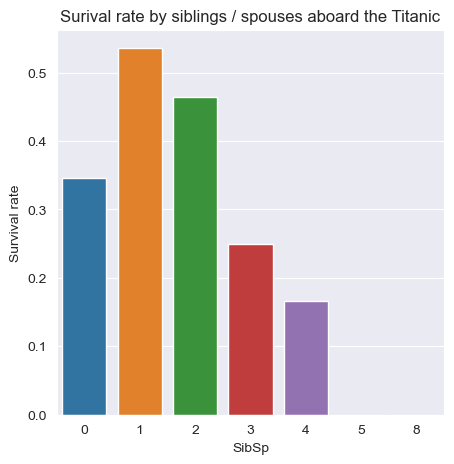

In [66]:
bar_chart_compare(train_df, "SibSp", title = "Surival rate by siblings / spouses aboard the Titanic")

In [67]:
train_df.groupby(['SibSp']).Survived.mean().to_frame()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


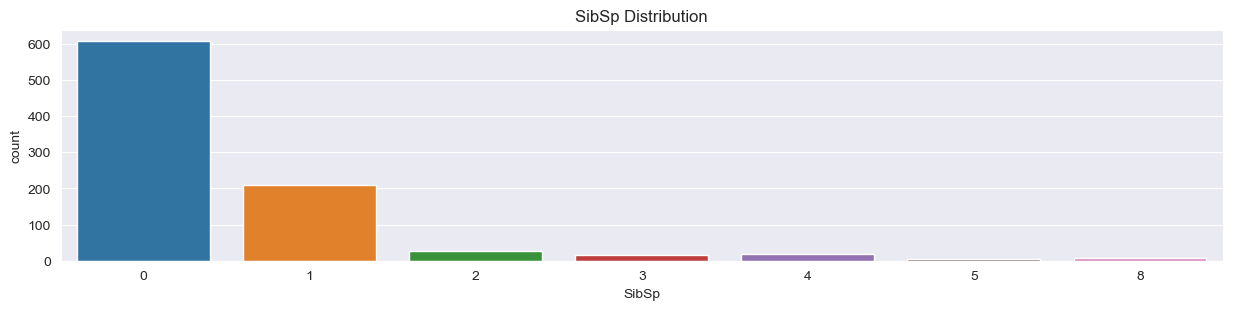

In [68]:
show_countplot(train_df, "SibSp", 'SibSp Distribution', (15,3))

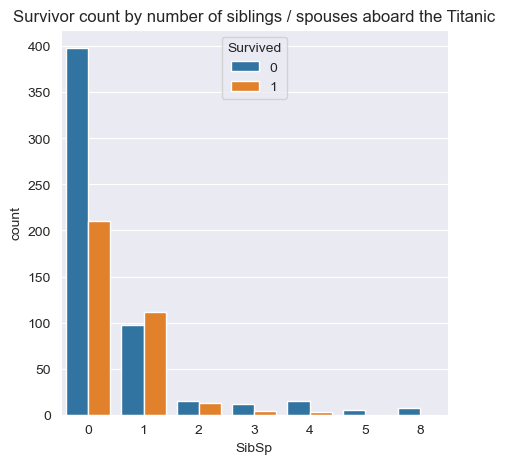

In [69]:
show_compare_countplot(train_df, "SibSp", "Survived", "Survivor count by number of siblings / spouses aboard the Titanic")

**Observarion:**
- The majority traveled alone.
- It seems that the more Sibling a passenger has the less chance of survival there is.

### 3.4. Insight based on Exploratory Data Analysis (EDA)
- Feature Extraction:
    1. create a new feature called Family size based on Parch and SibSp to get total count of family members on board.
    2. engineer the Name feature to extract Title as a new feature.
    3. create a new feature called Family type with labels=['Solo', 'Small', 'Big', 'Very big'])
    4. create a Fare class feature if it helps our analysis.
- Feature Selection:
    1. PassengerId and Ticket may be dropped those features do not provide relevant information or contribute to modeling and predictions where they are not informative, cannot be generalized
    2. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset
    3. Name feature may be dropped because has been extracted into 'Title'
    4. SibSp and Parch features may be dropped because has been extracted into the family_size feature
    5. Fare feature may be dropped because has been extracted into 'Fare_Class'
- Handling Imbalance Dataset:
    1. Oversampling with SMOTE because the proportion that survived was only 38.38%
- We may also add to our assumptions based on the problem description noted earlier.
    1. Women (Sex=female) were more likely to have survived.
    2. Children (Age<?) were more likely to have survived.
    3. The upper-class passengers (Pclass=1) were more likely to have survived.

## 3. Feature Extraction/Engineering

### 3.1. Feature Name

In [70]:
train_df[['Name']]

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


**Observation:**
To create a new feature we can extract the Titles from the name.

In [71]:
train_df['Title'] = train_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_df['Title'] = test_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
train_df['Title'].value_counts().to_frame()

,Title
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2
the Countess,1


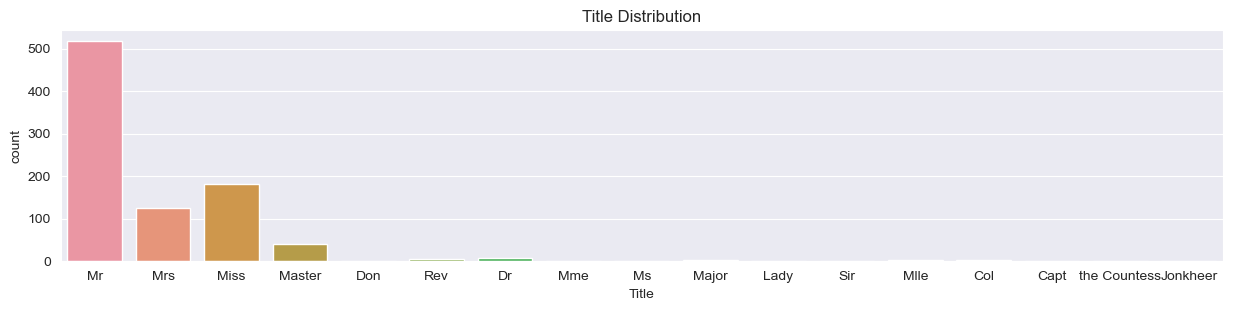

In [72]:
show_countplot(train_df, "Title", 'Title Distribution', (15,3))

**Observation:**
- As can see the Titles are severely imbalanced. In makes sense ti group less frequent Titles together.
- substitute male titles into Mr and female Titles into Mr:

In [73]:
train_df['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
test_df['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
train_df['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)
test_df['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

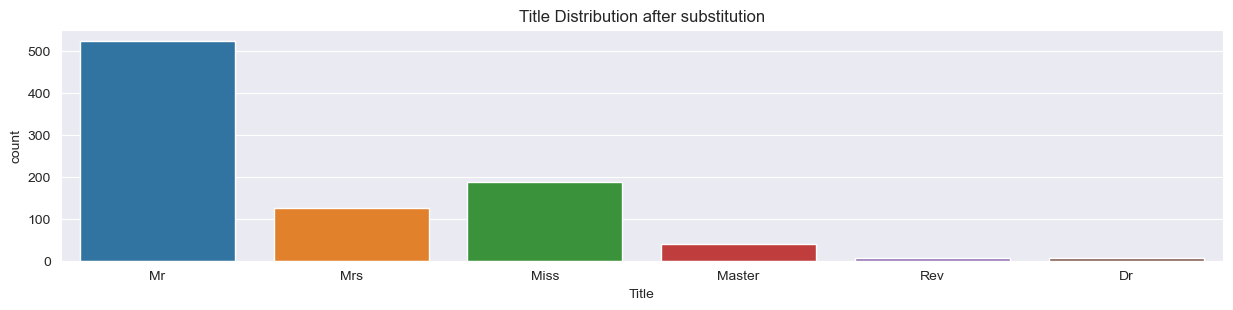

In [74]:
show_countplot(train_df, "Title", 'Title Distribution after substitution', (15,3))

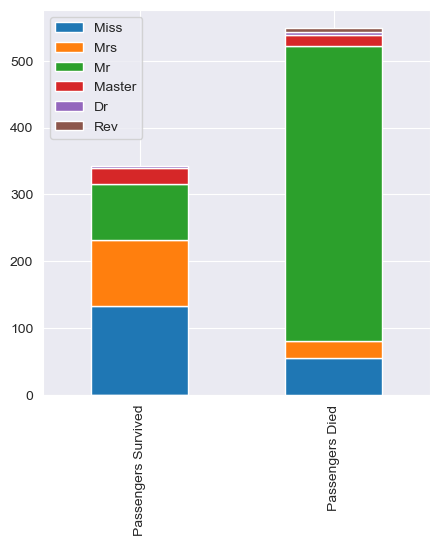

In [75]:
bar_chart_stacked(train_df, 'Title') 

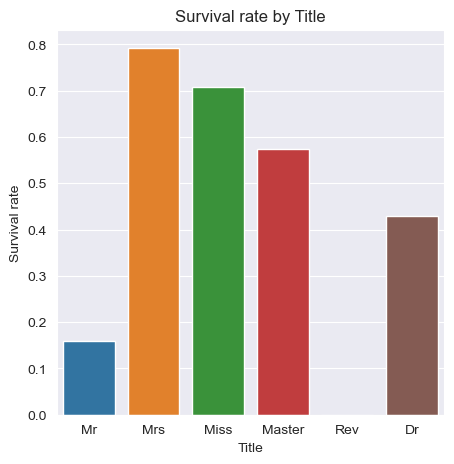

In [76]:
bar_chart_compare(train_df, "Title", title = "Survival rate by Title")

**Observation:**
- As expected female Titles result in a higher survival rate.
- Master and Dr are slightly have a surprisingly high survival rate even tough both are male titles
- Being "just" a Mr comes with a compromised survival rate of approx 15%
- It is interesting that all 6 Revernands died. Maybe they decided to accept their destiny and wanted to die with dignity 

### 3.2. Feature Cabin and Ticket

In [77]:
train_df[['Cabin', 'Ticket']]

,Cabin,Ticket
0,NaN,A/5 21171
1,C85,PC 17599
2,NaN,STON/O2. 3101282
3,C123,113803
4,NaN,373450
...,...,...
886,NaN,211536
887,B42,112053
888,NaN,W./C. 6607
889,C148,111369


**Observation**
- As we can see both features are not easy to deal with. Cabin contains a lot of Nans and the ticket seems not to provide any useful information.

- We can try different ideas:
    - Extract two leading letters to create a new feature
    - Extract number of letter in ticket to create a new features
    - Extract number of cabins used
    - Extract Cabin letter

### 3.3. Feature Family Size
Both features do not seem to be very informative, however, higher abstraction levels trees might pick up certain groups. For faster training, it might be beneficial to combine both features into 1 and create a family size feature.

In [78]:
train_df['Fam_size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Fam_size'] = test_df['SibSp'] + test_df['Parch'] + 1

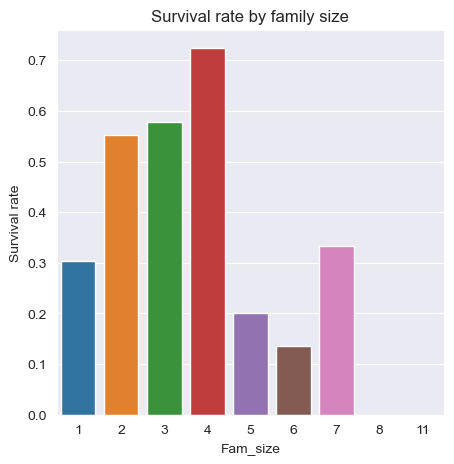

In [79]:
bar_chart_compare(train_df, "Fam_size", title = "Survival rate by family size")

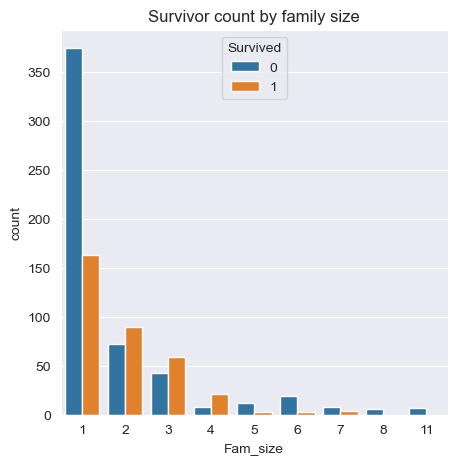

In [80]:
show_compare_countplot(train_df, "Fam_size", "Survived", "Survivor count by family size")

### 3.4. Feature Family Type
To further summarize the previous trend, as our final feature, Let's create four groups for family type

In [81]:
# Creation of four groups
train_df['Fam_type'] = pd.cut(train_df.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])
test_df['Fam_type'] = pd.cut(test_df.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])

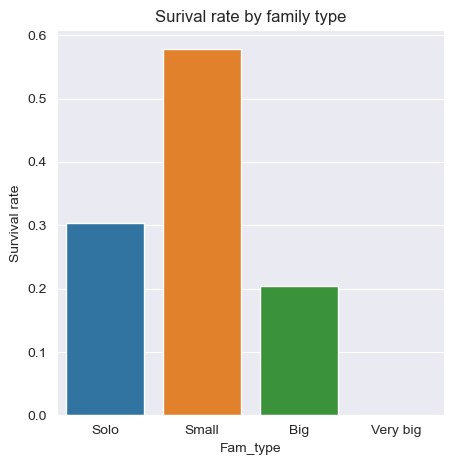

In [82]:
bar_chart_compare(train_df, "Fam_type", title = "Surival rate by family type")

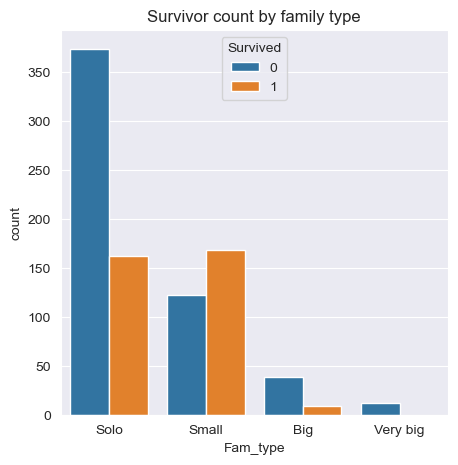

In [83]:
show_compare_countplot(train_df, "Fam_type", "Survived", "Survivor count by family type")

### 3.4. Feature Fare Class
the fare feature has outliers that are quite far away, but the data is considered important because it only has a small amount of data so a fare class is created where each class is calculated based on the proportion of the max paid

As we can see the likelihood of survival is definitely influenced by the price paid. 
- Cheap (0-25% of max Price): Surival Rate = 0.2 (aprox)
- Standard (25%-50% of max Price): Surival Rate = 0.3 (aprox)
- Expensive (50%-75% of max Price): Surival Rate = 0.45 (aprox)
- Luxury (75%-100% of max Price): Surival Rate = 0.55 (aprox)

#### Train Data

In [84]:
# Definisikan kategori-kategori yang diinginkan
categories = ['Cheap', 'Standard', 'Expensive', 'Luxury']

# Buat kolom baru 'Fare_Category' berdasarkan quartile cut
train_df['Fare_Class'] = pd.qcut(train_df['Fare'], q=[0, 0.25, 0.5, 0.75, 1.], labels=categories)

# Cetak DataFrame untuk melihat hasilnya
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fam_size,Fam_type,Fare_Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,Small,Cheap
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,Small,Luxury
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,Solo,Cheap
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,Small,Luxury
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,Solo,Standard


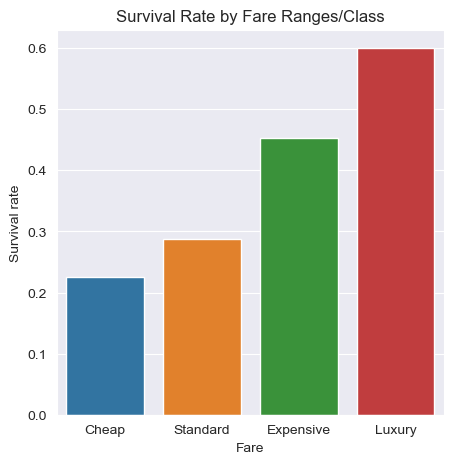

In [85]:
categories = ['Cheap', 'Standard', 'Expensive', 'Luxury']

plot_quartiles(train_df, "Fare", "Survival Rate by Fare Ranges/Class", categories)

#### Test Data

In [86]:
# Definisikan kategori-kategori yang diinginkan
categories = ['Cheap', 'Standard', 'Expensive', 'Luxury']

# Buat kolom baru 'Fare_Category' berdasarkan quartile cut
test_df['Fare_Class'] = pd.qcut(test_df['Fare'], q=[0, 0.25, 0.5, 0.75, 1.], labels=categories)

# Cetak DataFrame untuk melihat hasilnya
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fam_size,Fam_type,Fare_Class
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,Solo,Cheap
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,Small,Cheap
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,Solo,Standard
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,Solo,Standard
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,Small,Standard


## 3. Data Pre-Processing

### 3.1. Handling Missing Values
Based on EDA result

#### Train Data

If I drop rows with missing values, the dataset reduces to 712 rows from 891, which means wasting data. Machine learning models need data for training to perform well. So i preserve the data and make use of it as much as can. 

There are missing value in Age, Cabin, Embarked features contain a number of null values. Missing Value will be filled in.
- Age will be filled with the median value because f is a discrete numerical variable
- Cabin will be filled with the mode value because it is a categorical variable. But Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test datase
- Embarked will be filled with the mode value because it is a categorical variable

In [97]:
# fill null values of categorical features with mode

train_df['Age'].fillna(train_df['Age'].median(),inplace=True)
train_df['Cabin'].fillna(train_df['Cabin'].mode()[0],inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace=True)
train_df['Fare'].fillna(train_df['Fare'].median(),inplace=True)
train_df['Fare_Class'].fillna(train_df['Fare_Class'].mode()[0],inplace=True)

In [98]:
# validation
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
Fam_size       0
Fam_type       0
Fare_Class     0
dtype: int64

<AxesSubplot:>

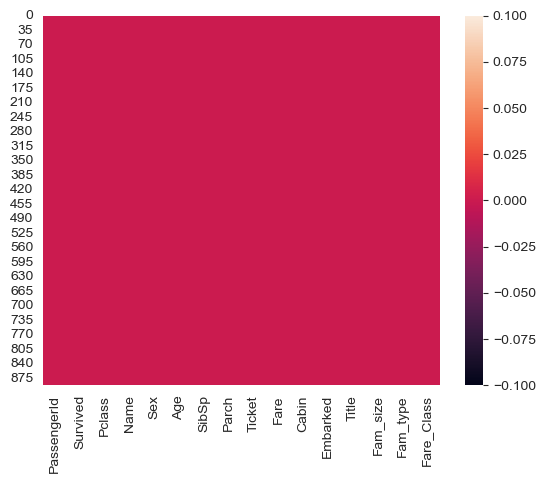

In [99]:
sns.heatmap(train_df.isna())

#### Test Data
There are missing value in Age, Cabin, Fare features contain a number of null values. Missing Value will be filled in.
- Age will be filled with the median value because f is a discrete numerical variable
- Cabin will be filled with the mode value because it is a categorical variable. But Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test datase
- Fare will be filled with the median value because it is a numerical variable

In [100]:
# fill null values of categorical features with mode

test_df['Age'].fillna(test_df['Age'].median(),inplace=True)
test_df['Cabin'].fillna(test_df['Cabin'].mode()[0],inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)
test_df['Fare_Class'].fillna(test_df['Fare_Class'].mode()[0],inplace=True)

In [102]:
# validation
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
Fam_size       0
Fam_type       0
Fare_Class     0
dtype: int64

<AxesSubplot:>

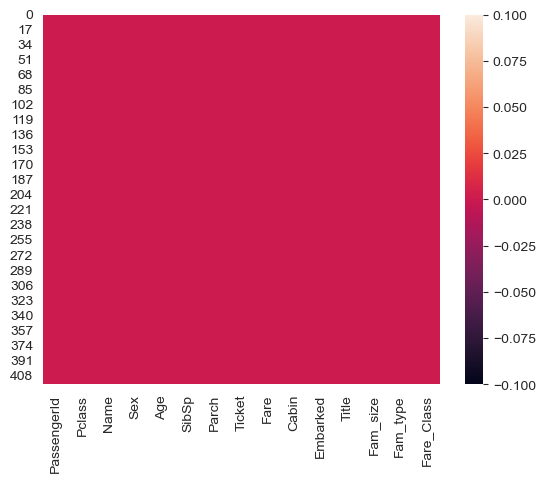

In [101]:
sns.heatmap(test_df.isna())

### 3.2. Handling Duplicated Data

In [103]:
# Check Duplicated Data

print(f'Number of duplicated data = {train_df.duplicated().sum()}')

Number of duplicated data = 0


there is no duplicate data so there is no need for handling duplicated data

### 3.3. Handling Outliers
outlier handling is not carried out, because all data is important and feature extraction has been carried out which makes outliers no longer exist and a feature transformation will be carried out which makes the features not right skewed

### 3.4. Feature Transformation
the features that are transformed are 'Age' and 'Fam_size' features where both have the right skewed distribution so log transformation is the right method

#### Train Data

In [104]:
train_df['Age'] = np.log(train_df['Age'])

In [105]:
train_df['Fam_size'] = np.log(train_df['Fam_size'])

In [106]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fam_size,Fam_type,Fare_Class
0,1,0,3,"Braund, Mr. Owen Harris",male,3.091042,1,0,A/5 21171,7.2500,B96 B98,S,Mr,0.693147,Small,Cheap
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.637586,1,0,PC 17599,71.2833,C85,C,Mrs,0.693147,Small,Luxury
2,3,1,3,"Heikkinen, Miss. Laina",female,3.258097,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Miss,0.000000,Solo,Cheap
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.555348,1,0,113803,53.1000,C123,S,Mrs,0.693147,Small,Luxury
4,5,0,3,"Allen, Mr. William Henry",male,3.555348,0,0,373450,8.0500,B96 B98,S,Mr,0.000000,Solo,Standard


#### Test Data

In [107]:
test_df['Age'] = np.log(test_df['Age'])

In [108]:
test_df['Fam_size'] = np.log(test_df['Fam_size'])

In [109]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fam_size,Fam_type,Fare_Class
0,892,3,"Kelly, Mr. James",male,3.540959,0,0,330911,7.8292,B57 B59 B63 B66,Q,Mr,0.000000,Solo,Cheap
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,3.850148,1,0,363272,7.0000,B57 B59 B63 B66,S,Mrs,0.693147,Small,Cheap
2,894,2,"Myles, Mr. Thomas Francis",male,4.127134,0,0,240276,9.6875,B57 B59 B63 B66,Q,Mr,0.000000,Solo,Standard
3,895,3,"Wirz, Mr. Albert",male,3.295837,0,0,315154,8.6625,B57 B59 B63 B66,S,Mr,0.000000,Solo,Standard
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3.091042,1,1,3101298,12.2875,B57 B59 B63 B66,S,Mrs,1.098612,Small,Standard


### 3.5. Feature Encoding
- Label Encoding:
    1. Pclass 
    2. Sex 
    3. Fam_type
    4. Fare_Class
- One Hot Encoding
    1. Embarked
    2. Title

#### Train Data

In [110]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fam_size,Fam_type,Fare_Class
0,1,0,3,"Braund, Mr. Owen Harris",male,3.091042,1,0,A/5 21171,7.2500,B96 B98,S,Mr,0.693147,Small,Cheap
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.637586,1,0,PC 17599,71.2833,C85,C,Mrs,0.693147,Small,Luxury
2,3,1,3,"Heikkinen, Miss. Laina",female,3.258097,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Miss,0.000000,Solo,Cheap
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.555348,1,0,113803,53.1000,C123,S,Mrs,0.693147,Small,Luxury
4,5,0,3,"Allen, Mr. William Henry",male,3.555348,0,0,373450,8.0500,B96 B98,S,Mr,0.000000,Solo,Standard


In [111]:
cat_features = ['Pclass', 'Sex', 'Title', 'Embarked', 'Fam_type', 'Fare_Class']

#---checking unique values for categorical features---
for cat in cat_features:
    print(cat, ':', set(train_df[cat]))

Pclass : {1, 2, 3}
Sex : {'female', 'male'}
Title : {'Mrs', 'Master', 'Rev', 'Miss', 'Dr', 'Mr'}
Embarked : {'C', 'S', 'Q'}
Fam_type : {'Small', 'Solo', 'Big', 'Very big'}
Fare_Class : {'Cheap', 'Expensive', 'Standard', 'Luxury'}


In [112]:
# #---create mapping for categorical features---

def pclass_map(x):
     if x == 1 : return 0
     elif x == 2 : return 1
     elif x == 3 : return 2

def sex_map(x):
     if x == 'female' : return 0
     elif x == 'male': return 1

def famtype_map(x):
     if x == 'Solo' : return 0
     elif x == 'Small': return 1
     elif x == 'Big' : return 2
     elif x == 'Very Big' : return 3

def fareclass_map(x):
     if x == 'Cheap' : return 0
     elif x == 'Standard': return 1
     elif x == 'Luxury' : return 2
     elif x == 'Expensive' : return 3

#---apply mapping to dataframe---
train_df['Pclass'] = train_df['Pclass'].map(pclass_map)
train_df['Sex'] = train_df['Sex'].map(sex_map)
train_df['Fam_type'] = train_df['Fam_type'].map(famtype_map)
train_df['Fare_Class'] = train_df['Fare_Class'].map(fareclass_map)

In [113]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fam_size,Fam_type,Fare_Class
0,1,0,2,"Braund, Mr. Owen Harris",1,3.091042,1,0,A/5 21171,7.2500,B96 B98,S,Mr,0.693147,1.0,0
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3.637586,1,0,PC 17599,71.2833,C85,C,Mrs,0.693147,1.0,2
2,3,1,2,"Heikkinen, Miss. Laina",0,3.258097,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Miss,0.000000,0.0,0
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3.555348,1,0,113803,53.1000,C123,S,Mrs,0.693147,1.0,2
4,5,0,2,"Allen, Mr. William Henry",1,3.555348,0,0,373450,8.0500,B96 B98,S,Mr,0.000000,0.0,1


In [114]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int32   
 1   Survived     891 non-null    int32   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    object  
 12  Title        891 non-null    object  
 13  Fam_size     891 non-null    float64 
 14  Fam_type     878 non-null    float64 
 15  Fare_Class   891 non-null    category
dtypes: category(1), float64(4), int32(2), int64(4), object(5)
memory usage: 98.6+ KB


In [115]:
# because fam_type has missing data, missing data handling is carried out on these features using the mode because the data is categorical
train_df['Fam_type'].fillna(train_df['Fam_type'].mode()[0],inplace=True)

In [116]:
# Mengubah tipe data kolom 'Age' menjadi integer
train_df['Fam_type'] = train_df['Fam_type'].astype(int)

In [117]:
# validation
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
Fam_size       0
Fam_type       0
Fare_Class     0
dtype: int64

In [118]:
#---One Hot Encoding---
train_df3 = pd.get_dummies(train_df, columns=['Embarked', 'Title'])
train_df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_Class,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,1,0,2,"Braund, Mr. Owen Harris",1,3.091042,1,0,A/5 21171,7.2500,...,0,0,0,1,0,0,0,1,0,0
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3.637586,1,0,PC 17599,71.2833,...,2,1,0,0,0,0,0,0,1,0
2,3,1,2,"Heikkinen, Miss. Laina",0,3.258097,0,0,STON/O2. 3101282,7.9250,...,0,0,0,1,0,0,1,0,0,0
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3.555348,1,0,113803,53.1000,...,2,0,0,1,0,0,0,0,1,0
4,5,0,2,"Allen, Mr. William Henry",1,3.555348,0,0,373450,8.0500,...,1,0,0,1,0,0,0,1,0,0


#### Test Data

In [120]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fam_size,Fam_type,Fare_Class
0,892,3,"Kelly, Mr. James",male,3.540959,0,0,330911,7.8292,B57 B59 B63 B66,Q,Mr,0.000000,Solo,Cheap
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,3.850148,1,0,363272,7.0000,B57 B59 B63 B66,S,Mrs,0.693147,Small,Cheap
2,894,2,"Myles, Mr. Thomas Francis",male,4.127134,0,0,240276,9.6875,B57 B59 B63 B66,Q,Mr,0.000000,Solo,Standard
3,895,3,"Wirz, Mr. Albert",male,3.295837,0,0,315154,8.6625,B57 B59 B63 B66,S,Mr,0.000000,Solo,Standard
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3.091042,1,1,3101298,12.2875,B57 B59 B63 B66,S,Mrs,1.098612,Small,Standard


In [121]:
#---apply mapping to dataframe---
test_df['Pclass'] = test_df['Pclass'].map(pclass_map)
test_df['Sex'] = test_df['Sex'].map(sex_map)
test_df['Fam_type'] = test_df['Fam_type'].map(famtype_map)
test_df['Fare_Class'] = test_df['Fare_Class'].map(fareclass_map)

In [122]:
#---One Hot Encoding---
test_df3 = pd.get_dummies(test_df, columns=['Embarked', 'Title'])
test_df3.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Fare_Class,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,892,2,"Kelly, Mr. James",1,3.540959,0,0,330911,7.8292,B57 B59 B63 B66,...,0,0,1,0,0,0,0,1,0,0
1,893,2,"Wilkes, Mrs. James (Ellen Needs)",0,3.850148,1,0,363272,7.0000,B57 B59 B63 B66,...,0,0,0,1,0,0,0,0,1,0
2,894,1,"Myles, Mr. Thomas Francis",1,4.127134,0,0,240276,9.6875,B57 B59 B63 B66,...,1,0,1,0,0,0,0,1,0,0
3,895,2,"Wirz, Mr. Albert",1,3.295837,0,0,315154,8.6625,B57 B59 B63 B66,...,1,0,0,1,0,0,0,1,0,0
4,896,2,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,3.091042,1,1,3101298,12.2875,B57 B59 B63 B66,...,1,0,0,1,0,0,0,0,1,0


In [123]:
test_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   418 non-null    int64   
 1   Pclass        418 non-null    int64   
 2   Name          418 non-null    object  
 3   Sex           418 non-null    int64   
 4   Age           418 non-null    float64 
 5   SibSp         418 non-null    int64   
 6   Parch         418 non-null    int64   
 7   Ticket        418 non-null    object  
 8   Fare          418 non-null    float64 
 9   Cabin         418 non-null    object  
 10  Fam_size      418 non-null    float64 
 11  Fam_type      412 non-null    float64 
 12  Fare_Class    418 non-null    category
 13  Embarked_C    418 non-null    uint8   
 14  Embarked_Q    418 non-null    uint8   
 15  Embarked_S    418 non-null    uint8   
 16  Title_Dr      418 non-null    uint8   
 17  Title_Master  418 non-null    uint8   
 18  Title_Miss

In [124]:
# because fam_type has missing data, missing data handling is carried out on these features using the mode because the data is categorical
test_df3['Fam_type'].fillna(test_df['Fam_type'].mode()[0],inplace=True)
test_df3['Fare_Class'].fillna(test_df['Fare_Class'].mode()[0],inplace=True)

In [125]:
# validation
test_df3.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Fam_size        0
Fam_type        0
Fare_Class      0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Title_Dr        0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_Rev       0
dtype: int64

### 3.6. Feature Selection

#### Remove Unused  Features

- PassengerId and Ticket may be dropped those features do not provide relevant information or contribute to modeling and predictions where they are not informative, cannot be generalized
- Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset
- Name feature may be dropped because has been extracted into 'Title'
- SibSp and Parch features may be dropped because has been extracted into the family_size feature
- Fare feature may be dropped because has been extracted into 'Fare_Class'

In [126]:
# drop feature PassangerId and Name karena tidak dapat dilihat grafik nya karena unique
drop = ['PassengerId', 'Name', 'SibSp', 'Fare', 'Ticket', 'Parch', 'Cabin']
train_df4 = train_df3.drop(drop, axis=1)

In [127]:
train_df4.head()

,Survived,Pclass,Sex,Age,Fam_size,Fam_type,Fare_Class,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,0,2,1,3.091042,0.693147,1,0,0,0,1,0,0,0,1,0,0
1,1,0,0,3.637586,0.693147,1,2,1,0,0,0,0,0,0,1,0
2,1,2,0,3.258097,0.000000,0,0,0,0,1,0,0,1,0,0,0
3,1,0,0,3.555348,0.693147,1,2,0,0,1,0,0,0,0,1,0
4,0,2,1,3.555348,0.000000,0,1,0,0,1,0,0,0,1,0,0


In [128]:
train_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int32   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    int64   
 3   Age           891 non-null    float64 
 4   Fam_size      891 non-null    float64 
 5   Fam_type      891 non-null    int32   
 6   Fare_Class    891 non-null    category
 7   Embarked_C    891 non-null    uint8   
 8   Embarked_Q    891 non-null    uint8   
 9   Embarked_S    891 non-null    uint8   
 10  Title_Dr      891 non-null    uint8   
 11  Title_Master  891 non-null    uint8   
 12  Title_Miss    891 non-null    uint8   
 13  Title_Mr      891 non-null    uint8   
 14  Title_Mrs     891 non-null    uint8   
 15  Title_Rev     891 non-null    uint8   
dtypes: category(1), float64(2), int32(2), int64(2), uint8(9)
memory usage: 43.8 KB


#### Correlation Heatmap
Numemrical Feature with Target Feature (Survived)

<AxesSubplot:>

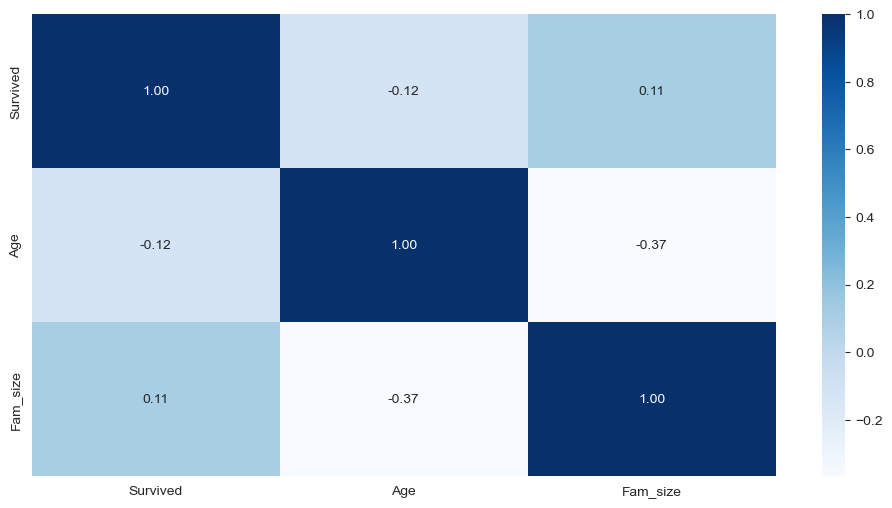

In [129]:
data_corr = train_df4[['Survived', 'Age', 'Fam_size']]

# Create Heatmap Correlation Chart for Each Numerical Features
plt.figure(figsize=(12, 6))
sns.heatmap(data_corr.corr(), cmap='Blues', annot=True, fmt='.2f')

#### Chi-Square Test (Categorical Variables)

**Hypothesis**

H0 : There is no relationship between Predictor Variable and Target Variable

H1 : There is a relationship between Predictor Variable and Target Variable

In [130]:
def chi2(df, col1, col2):    
    #---create the contingency table---
    df_crosstab= pd.crosstab(index = df[col1], columns = df[col2])
    
    #---calculate degree of freedom---
    degree_f = (df_crosstab.shape[0]-1) * (df_crosstab.shape[1]-1)
    
    #---sum up the totals for row and columns---
    df_crosstab.loc[:,'Total']= df_crosstab.sum(axis=1)
    df_crosstab.loc['Total']= df_crosstab.sum()
    
    #---create the expected value dataframe---
    df_exp = df_crosstab.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(
        df_crosstab.sum(1).values,df_crosstab.sum().values) / df_crosstab.sum().sum()            
    
    # calculate chi-square values
    df_chi2 = ((df_crosstab - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    #---get chi-square score---   
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
    
    #---calculate the p-value---
    from scipy import stats
    from scipy.stats import chi2
    alpha=0.05
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)
    critical_value=chi2.ppf(q=1-alpha,df=degree_f)
    
    print ('chi_square:',chi_square_score)
    print ('critical_value:',critical_value)
    print ('Df:', degree_f)
    print ('p-value:',p)
    print ('alpha:',alpha)
    print ('')
    print ('**Kesimpulan**')
    if p<=alpha:
        print('Reject H0, There is a relationship between variable', col1, 'and Survived (Target Variable)')
    else:
        print('Retain H0, There is no relationship between variable', col1, 'and Survived (Target Variable)') 
    return

In [131]:
chi2(train_df4, 'Pclass', 'Survived')

chi_square: 102.88898875696057
critical_value: 5.991464547107979
Df: 2
p-value: 4.5492517112987287e-23
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Pclass and Survived (Target Variable)


In [132]:
chi2(train_df4, 'Sex', 'Survived')

chi_square: 263.05057407065567
critical_value: 3.841458820694124
Df: 1
p-value: 3.711747770113424e-59
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Sex and Survived (Target Variable)


In [133]:
chi2(train_df4, 'Age', 'Survived')

chi_square: 113.77670967050014
critical_value: 109.77330935028795
Df: 87
p-value: 0.02858849255229426
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Age and Survived (Target Variable)


In [134]:
chi2(train_df4, 'Fam_size', 'Survived')

chi_square: 80.67231343783078
critical_value: 15.50731305586545
Df: 8
p-value: 3.579668975443533e-14
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Fam_size and Survived (Target Variable)


In [135]:
chi2(train_df4, 'Fam_type', 'Survived')

chi_square: 71.40187318774946
critical_value: 5.991464547107979
Df: 2
p-value: 3.1280971926831667e-16
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Fam_type and Survived (Target Variable)


In [136]:
chi2(train_df4, 'Embarked_C', 'Survived')

chi_square: 25.219614842578864
critical_value: 3.841458820694124
Df: 1
p-value: 5.115923342325004e-07
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Embarked_C and Survived (Target Variable)


In [137]:
chi2(train_df4, 'Embarked_Q', 'Survived')

chi_square: 0.011872836721844467
critical_value: 3.841458820694124
Df: 1
p-value: 0.9132321963060556
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Embarked_Q and Survived (Target Variable)


In [138]:
chi2(train_df4, 'Embarked_S', 'Survived')

chi_square: 19.962781622344224
critical_value: 3.841458820694124
Df: 1
p-value: 7.896431518988795e-06
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Embarked_S and Survived (Target Variable)


In [139]:
chi2(train_df4, 'Title_Dr', 'Survived')

chi_square: 0.059694917324466065
critical_value: 3.841458820694124
Df: 1
p-value: 0.806978787368113
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Title_Dr and Survived (Target Variable)


In [140]:
chi2(train_df4, 'Title_Mr', 'Survived')

chi_square: 270.7584395818893
critical_value: 3.841458820694124
Df: 1
p-value: 7.755530238179443e-61
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Title_Mr and Survived (Target Variable)


In [141]:
chi2(train_df4, 'Title_Master', 'Survived')

chi_square: 6.4709266948796
critical_value: 3.841458820694124
Df: 1
p-value: 0.010965334026465365
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Title_Master and Survived (Target Variable)


In [142]:
chi2(train_df4, 'Title_Miss', 'Survived')

chi_square: 105.50591893777278
critical_value: 3.841458820694124
Df: 1
p-value: 9.461487168982024e-25
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Title_Miss and Survived (Target Variable)


In [143]:
chi2(train_df4, 'Title_Mrs', 'Survived')

chi_square: 102.41892822434033
critical_value: 3.841458820694124
Df: 1
p-value: 4.4938723252419114e-24
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Title_Mrs and Survived (Target Variable)


In [144]:
chi2(train_df4, 'Title_Rev', 'Survived')

chi_square: 3.7630452903584333
critical_value: 3.841458820694124
Df: 1
p-value: 0.05239706768618878
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Title_Rev and Survived (Target Variable)


**Correlation:**
- Age feature has a correlation with the survived feature of 12%
- Fam_size feature has a correlation with the survived feature of 11%

**Chi-Square test:**
based on the chi square test, of all categorical features there are 3 features that have no effect, namely 
- Embarked_Q
- Title_Dr
- Title_Rev

so it is recommended to drop these features

In [145]:
# Drop feature
drop = ['Embarked_Q', 'Title_Dr', 'Title_Rev']
train_df5 = train_df4.drop(drop, axis=1)

In [146]:
# Drop Feature in Test Data 
drop = ['PassengerId', 'Name', 'SibSp', 'Fare', 'Ticket', 'Parch', 'Cabin', 'Embarked_Q', 'Title_Dr', 'Title_Rev']
test_df4 = test_df3.drop(drop, axis=1)

In [147]:
# Changed data type of 'Fare_Class' column to integer
train_df5['Fare_Class'] = train_df5['Fare_Class'].astype(int)
test_df4['Fare_Class'] = test_df4['Fare_Class'].astype(int)

## 4. Model Predict

### 4.1. Train and Test Split Data

In [148]:
# read data for y test (survived)
df = pd.read_csv('gender_submission.csv')

In [149]:
X_train = train_df5.drop("Survived", axis=1)
y_train = train_df5[["Survived"]]
X_test  = test_df4.copy()
y_test = df[['Survived']]
X_train.shape, y_train.shape, X_test.shape

((891, 12), (891, 1), (418, 12))

In [150]:
# Consolidate test and train data by row
X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)

### 4.2. Handling Class Imbalance Target

In [152]:
from imblearn.over_sampling import SMOTE

# Random Over Sampling
sm = SMOTE(random_state=0)
sm.fit(X_train, y_train)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

### 4.3. Modeling

In [167]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score

def createmodel(x_train, x_test, y_train, y_test, models, model_names):
    performance = []
    for model, model_name in zip(models, model_names):
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        y_train_pred = model.predict(x_train)
        accuracy_train = np.round(accuracy_score(y_train, y_train_pred), 3)
        accuracy_test = np.round(accuracy_score(y_test, y_pred), 3)
        performance.append([
            accuracy_train,
            accuracy_test,
            np.round(precision_score(y_train, y_train_pred, pos_label=0), 3),
            np.round(precision_score(y_test, y_pred, pos_label=0), 3),
            np.round(recall_score(y_train, y_train_pred, pos_label=0), 3),
            np.round(recall_score(y_test, y_pred, pos_label=0), 3),
            np.round(roc_auc_score(y_train, y_train_pred), 3),
            np.round(roc_auc_score(y_test, y_pred), 3)
        ])

    performance_df = pd.DataFrame(
        data=performance,
        columns='Train\nAccuracy,Test\nAccuracy,Train\nPrecision,Test\nPrecision,Train\nRecall,Test\nRecall,Train\nROC-AUC,Test\nROC-AUC'.split(","),
        index=model_names  # Menggunakan model_names sebagai label index
    )

    plt.figure(figsize=(12, 8))
    sns.heatmap(performance_df, annot=True, cmap="Blues", annot_kws={"fontsize": 14})
    plt.tick_params(axis='both', which='major', labelsize=14, labelbottom=False, bottom=False, top=False, labeltop=True)
    plt.tight_layout()
    plt.savefig('modelling.png')
    plt.show()


In [168]:
# Define Classification Algorithms

models = [LogisticRegression(random_state=42), KNeighborsClassifier(), GaussianNB(), SVC(random_state=42), DecisionTreeClassifier(random_state=42),
          RandomForestClassifier(random_state=42), AdaBoostClassifier(random_state=42), GradientBoostingClassifier(random_state=42), LGBMClassifier(random_state=42),
          XGBClassifier(random_state=42)]

model_names = ['LogisticRegression', 'K Nearest Neighbors', 'GaussianNB', 'SVC', 'DecisionTreeClassifier',
          'Random Forest', 'AdaBoost', 'Gradient Boosting', 'LGBMClassifier',
          'XGBClassifier']

#### Without SMOTE

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 97
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

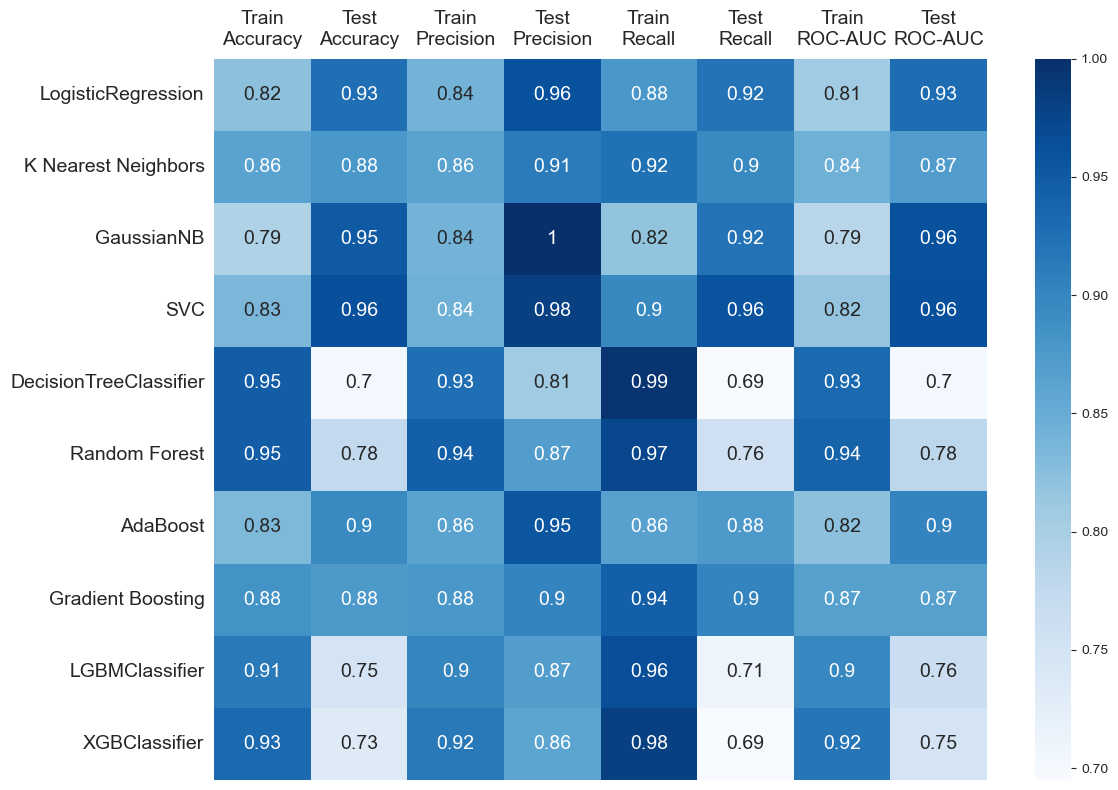

In [169]:
# Modeling

createmodel(X_train,X_test,y_train,y_test, models, model_names)

#### With SMOTE

[LightGBM] [Info] Number of positive: 549, number of negative: 549
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 1098, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


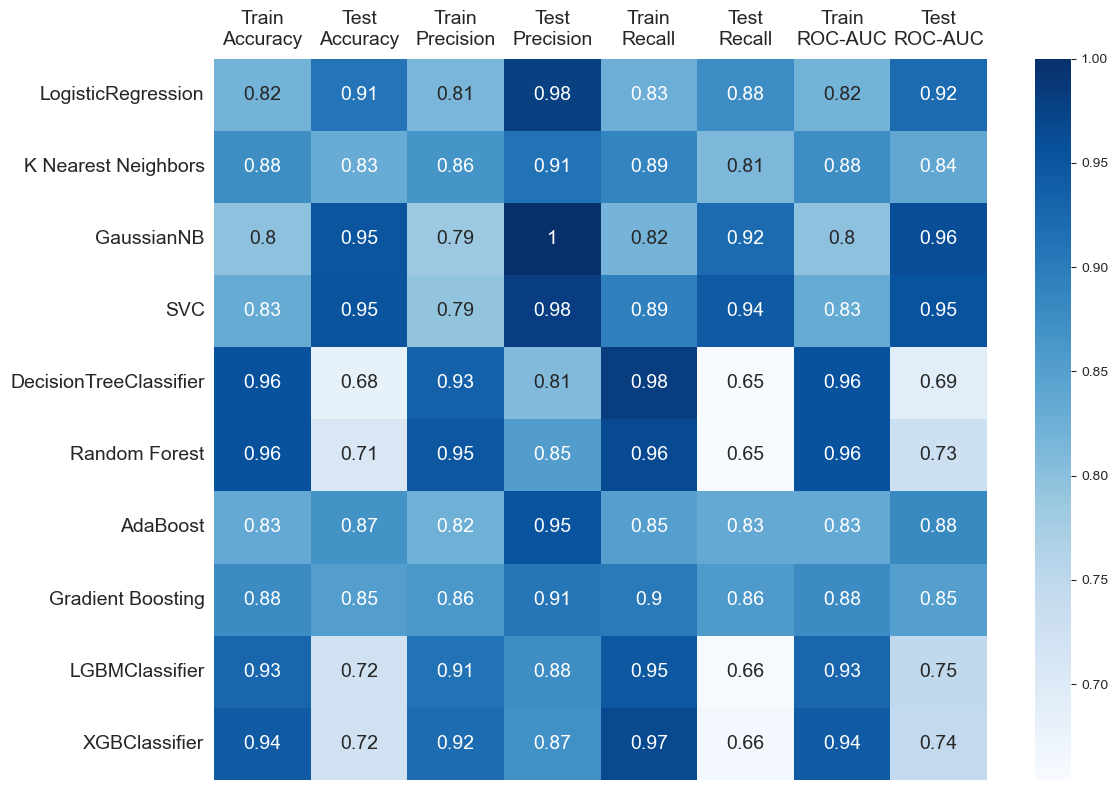

In [170]:
# Modeling with SMOTE dataset

createmodel(X_smote,X_test,y_smote,y_test, models, model_names)

#### The Best Model:
- Based on the Experiment above, i have various Test ROC-AUC. I decide to do Hyperparameter Tuning with the Top 1 Classification Algorithms, there is Gradient Boosting Classifier without SMOTE.
- the choice of the roc-auc metric is due to measuring the model's ability to distinguish between positive and negative classes. This metric is suitable for datasets that have class imbalance (for example, there are significantly fewer passengers who survived than those who did not survive).
- I chose this model which has a small or close to zero difference between the ROC-AUC test and the ROC-AUC train. This indicates that the model is not overfitting or underfitting. Ideally, if the difference between the ROC-AUC test and the ROC-AUC train is very small or the same, it can be assumed that the model has stable performance and good generalization for new data.

In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred, pos_label=0))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred, pos_label=0))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred, pos_label=0))
    print("")
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

def eval_cv_ab_roc_auc(model):
    score = cross_validate(model, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

import warnings
warnings.filterwarnings('ignore')

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

##### Hyperparameter Tuning

In [177]:
# Hyperparameter Tuning
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
    'max_depth': [int(x) for x in np.linspace(3, 10, num=8)],
    'min_samples_split': [int(x) for x in np.linspace(3, 10, num=5)],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [float(x) for x in np.linspace(0.01, 0.5, num=10)],
}

# Init
gb = GradientBoostingClassifier(random_state=42)
gb_tuned = RandomizedSearchCV(gb, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
gb_tuned.fit(X_train, y_train)

# Predict & Evaluation
eval_classification(gb_tuned)
eval_cv_ab_roc_auc(gb_tuned)

# Show Best Hyperparameter
show_best_hyperparameter(gb_tuned)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.90
Recall (Test Set): 0.89
F1-Score (Test Set): 0.89

roc_auc (train-proba): 0.95
roc_auc (test-proba): 0.91
roc_auc (crossval train): 0.9540064662820011
roc_auc (crossval test): 0.8621477616683981
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


##### Model Evaluation

In [179]:
y_train_pred = gb_tuned.predict(X_smote)
y_test_pred = gb_tuned.predict(X_test)

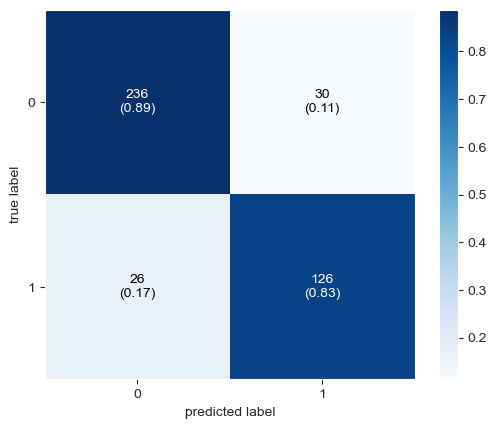

In [180]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(confusion_matrix(y_test, y_test_pred),  show_absolute=True, show_normed=True, colorbar=True)
plt.show()

Berdasarkan 

##### Prediction Result

In [181]:
print('TRAINING RESULT:')
print('======================================================')
print('F2 Score:', np.round(roc_auc_score(y_smote, y_train_pred),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_smote, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_smote, y_train_pred))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('F2 Score:', np.round(roc_auc_score(y_smote, y_train_pred),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))

TRAINING RESULT:
F2 Score: 0.88
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       549
           1       0.93      0.82      0.87       549

    accuracy                           0.88      1098
   macro avg       0.89      0.88      0.88      1098
weighted avg       0.89      0.88      0.88      1098

Confussion Matrix ------------------------------------
[[517  32]
 [100 449]]


TESTING RESULT:
F2 Score: 0.88
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       266
           1       0.81      0.83      0.82       152

    accuracy                           0.87       418
   macro avg       0.85      0.86      0.86       418
weighted avg       0.87      0.87      0.87       418

Confussion Matrix ------------------------------------
[[236  30]
 [ 26 126]]


In [182]:
predict = pd.DataFrame(columns= ['actual'] + ['predict'])
predict['actual'] = y_test['Survived']
predict['predict'] = y_test_pred
predict.head()

,actual,predict
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0


In [185]:
predict.to_csv('titanic_survival_predict.csv')

##### Model Interpretation with SHAP Value

         Feature  Importance
10      Title_Mr    0.898301
0         Pclass    0.382144
1            Sex    0.339984
2            Age    0.283458
5     Fare_Class    0.203714
3       Fam_size    0.165587
7     Embarked_S    0.103448
9     Title_Miss    0.058893
6     Embarked_C    0.031879
4       Fam_type    0.016787
8   Title_Master    0.014205
11     Title_Mrs    0.002884


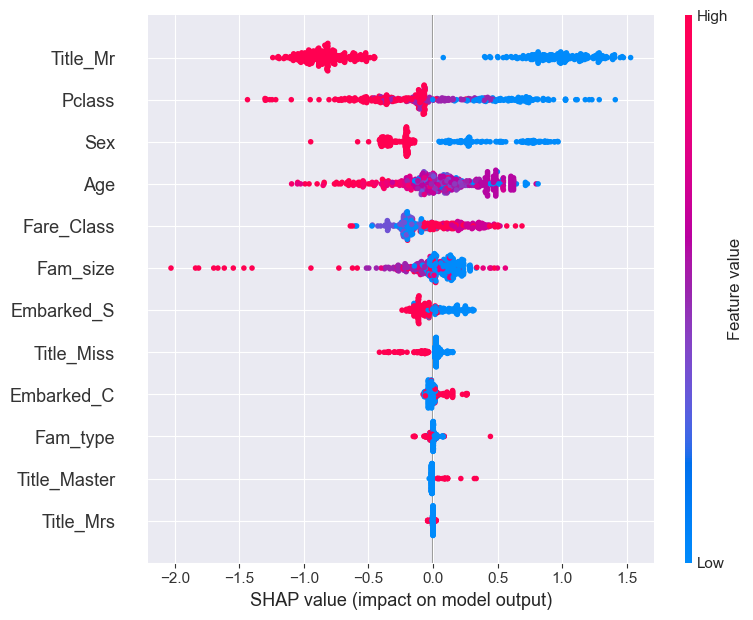

In [186]:
import shap
gb_tuned.fit(X_smote,y_smote)

# Get the best model with tuned hyperparameters
best_model = gb_tuned.best_estimator_

# Initialize the SHAP explainer with the best model
explainer = shap.Explainer(best_model, X_smote)

# Calculate SHAP values for all features
shap_values = explainer(X_test)

# Calculate feature importance
feature_importance = np.abs(shap_values.values).mean(axis=0)

# Create a DataFrame with feature names and importance scores
feature_importance_car = pd.DataFrame(
    {'Feature': X.columns, 'Importance': feature_importance}
).sort_values(by='Importance', ascending=False)

# Print the feature importance
print(feature_importance_car)

# Plot the feature importance using a bar chart
shap.summary_plot(shap_values, X_test)

## Conclusion

Based on the knowledge based on SHAP Value that the most influential features in determining the likelihood of survival from the Titanic dataset are title_mr, pclass, and sex, we can draw several conclusions about "what sorts of people were more likely to survive?".
1. title_mr: Passengers with the title "Mr." (likely adult male passengers) have a lower chance of survival. This title may indicate that they are adult male passengers who possibly prioritized women and children during the evacuation. This could lead to a lower survival rate for passengers with the title "Mr."
2. pclass: Passengers in higher classes (pclass=1) have a higher chance of survival compared to passengers in lower classes (pclass=2 or pclass=3). Passengers in higher classes likely have better access to facilities and lifeboats, and they might be given priority during the evacuation.
3. sex: Female passengers have a higher chance of survival compared to male passengers. This might reflect the implementation of the "Women and Children First" evacuation policy, where women are given priority during emergency evacuations.


## Insights & Recommendations
Based on the analysis results, the following solutions can be considered:

1. Increase awareness and safety measures for adult male passengers (identified with the title "Mr."). Training and awareness campaigns about evacuation safety and prioritizing vulnerable groups during emergencies could enhance the survival chances of adult male passengers.
2. Improve facilities and lifeboats for passengers in lower classes (pclass=2 or pclass=3) to enhance the safety of passengers in lower classes who have a lower chance of survival.
3. Continue to adhere to the "Women and Children First" policy and ensure its enforcement during emergencies or evacuations.

By understanding the above factors, further actions can be taken to improve the safety and survival chances of passengers in the future.